# Preamble

In [7]:
from scripts.open_preprocess_racmo import *
from scripts.paths import *
from scripts.dicts import *

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np


import pandas as pd

# Greenland as a whole

In [8]:
dict_coords = {}
dict_vars = {}

## Annual

In [9]:
time_resolution = 'Annual'
spatial_resolution = '1k'

years= ['1958', '2023']



### Runoff

In [10]:
masks1k = xr.open_dataset("/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc")


#### Tundra runoff

In [6]:

# dsRunoff = read_RACMO(spatial_resolution, time_resolution,years=years, variable="runoff")
# dsRunoff = dsRunoff.sel(time=slice(years[0], years[1]))

if spatial_resolution == '1k':
    # dsRunoff = dsRunoff.rename({'runoffcorr': 'runoff'})
    dsRunoffTundra_mmyear = read_RACMO('1k_reproject', time_resolution,years=years, variable="runoff")
    dsRunoffTundra_mmyear = dsRunoffTundra_mmyear.rename({'rlon': 'x', 'rlat': 'y'})
    dsRunoffTundra = volume(mask_data(dsRunoffTundra_mmyear['runoff'], "LSM Tundra",spatial_resolution), spatial_resolution)
    dict_coords['Tundra'] = dict({'x': 'x', 'y': 'y'})
else: 
    dsRunoffTundra = volume(mask_data(dsRunoff['runoff'], "LSM Tundra",spatial_resolution), spatial_resolution)
    dsRunoffIce = volume(mask_data(dsRunoff['runoff'], "PROMICE_Ice_Total",spatial_resolution),spatial_resolution)
dsRunoffTundraSum = dsRunoffTundra.sum(dim=['x', 'y']).resample(time='AS').sum()

Reading locally reprojected 1k data
Finished reading locally reprojected 1k data



KeyboardInterrupt



In [ ]:
dict_vars['RACMO'] = dict({'Runoff':'runoffcorr'})


#### Runoff Ice Caps and Sheet on Ice 500m - Annual

In [ ]:
folder500m = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/"
openMAR = True
dsRunoff500mRACMO = xr.open_mfdataset(folder500m + "Annual/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc")
# dsRunoff500mMAR   = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.MAR3v14.GrIS.0.5km.YY.nc")

# SUM
if os.path.exists(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc"):
    dsRunoff500mRACMO_sum = xr.open_mfdataset(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc")
else:
    dsRunoff500mRACMO_sum = dsRunoff500mRACMO.runoffcorr.sum(dim=['x', 'y'])/4
if openMAR:
    if os.path.exists(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.YY.nc"):
        dsRunoff500mMAR_sum = xr.open_dataset(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.YY.nc")
    else:
        dsRunoff500mMAR_sum = ds500mMAR.runoffcorr.sum(dim=['x', 'y'])/4
    dsRunoff500mMAR_sum = dsRunoff500mMAR_sum/1e6
    dsRunoff500mMAR_sum.attrs['units'] = 'km3 w.e.'
    dsRunoff500mMAR_sum.resample(time='YS').sum()

dsRunoff500mRACMO_sum = dsRunoff500mRACMO_sum/1e6  #mm/km2 to km3
dsRunoff500mRACMO_sum.attrs['units'] = 'km3 w.e.'
dsRunoff500mRACMO_sum.resample(time='YS').sum()

<xarray.Dataset> Size: 1kB
Dimensions:     (time: 84)
Coordinates:
  * time        (time) datetime64[ns] 672B 1940-01-01 1941-01-01 ... 2023-01-01
Data variables:
    runoffcorr  (time) float32 336B dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    units:    km3 w.e.

#### MAR

In [ ]:
# dsRunoff500mRACMO = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc")
# mask_500m         = folder500m + "GrIS_topo_icemask_lsm_lon_lat_0.5km.nc"
# mask_500m = xr.open_dataset(mask_500m)

# dsRunoff500mRACMO_GIC = dsRunoff500mRACMO['runoffcorr'].where(((mask_500m['GIC']==1).values))
# dsRunoff500mRACMO_GrIS = dsRunoff500mRACMO['runoffcorr'].where(((mask_500m['GrIS']==1).values))
# dsRunoff500mRACMO_GIC_sum = dsRunoff500mRACMO_GIC.sum(dim=['x', 'y'])/4
# dsRunoff500mRACMO_GrIS_sum = dsRunoff500mRACMO_GrIS.sum(dim=['x', 'y'])/4

# dsRunoff500mRACMO_GIC.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mRACMO_GrIS.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc")
# dsRunoff500mRACMO_GIC_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mRACMO_GrIS_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc")

# # do the same but for mar
# print("MAR")
# dsRunoff500mMAR = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.MAR3v14.GrIS.0.5km.YY.nc")
# mask_500m         = folder500m + "GrIS_topo_icemask_lsm_lon_lat_0.5km.nc"
# mask_500m = xr.open_dataset(mask_500m)

# print("Selecting GIC and GrIS")
# dsRunoff500mMAR_GIC = dsRunoff500mMAR['runoffcorr'].where(((mask_500m['GIC']==1).values))
# dsRunoff500mMAR_GrIS = dsRunoff500mMAR['runoffcorr'].where(((mask_500m['GrIS']==1).values))
# dsRunoff500mMAR_GIC_sum = dsRunoff500mMAR_GIC.sum(dim=['x', 'y'])/4
# dsRunoff500mMAR_GrIS_sum = dsRunoff500mMAR_GrIS.sum(dim=['x', 'y'])/4

# dsRunoff500mMAR_GIC_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mMAR_GrIS_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc")
# dsRunoff500mMAR_GIC.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mMAR_GrIS.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc")



Open RACMO ice per ice type

In [11]:
path_sums_masks_500m  = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/"

file_paths = {
    "dsRunoff500mRACMO_GIC": path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mRACMO_GrIS": path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc",
    "dsRunoff500mRACMO_GIC_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mRACMO_GrIS_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc"
}
datasets_RACMO_runoff_500m = {}

for name, file_path in file_paths.items():
    if os.path.exists(file_path):
        datasets_RACMO_runoff_500m[name] = xr.open_dataset(file_path)
        print(f"Opened {file_path}")

dsRunoff500mRACMO_GIC_sum = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GIC_sum"]/1e6
dsRunoff500mRACMO_GrIS_sum = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GrIS_sum"]/1e6
dsRunoff500mRACMO_GIC = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GIC"]
dsRunoff500mRACMO_GrIS = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GrIS"]


fpaths_MAR = {
    "dsRunoff500mMAR_GIC": path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mMAR_GrIS": path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc",
    "dsRunoff500mMAR_GIC_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mMAR_GrIS_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc"
}

datasets_MAR_runoff_500m = {}

for name, file_path in fpaths_MAR.items():
    if os.path.exists(file_path):
        datasets_MAR_runoff_500m[name] = xr.open_dataset(file_path)
        print(f"Opened {file_path}")
dsRunoff500mMAR_GIC_sum = datasets_MAR_runoff_500m["dsRunoff500mMAR_GIC_sum"]/1e6
dsRunoff500mMAR_GrIS_sum = datasets_MAR_runoff_500m["dsRunoff500mMAR_GrIS_sum"]/1e6
dsRunoff500mMAR_GIC = datasets_MAR_runoff_500m["dsRunoff500mMAR_GIC"]
dsRunoff500mMAR_GrIS = datasets_MAR_runoff_500m["dsRunoff500mMAR_GrIS"]

for  dataset in [dsRunoff500mRACMO_GIC_sum, dsRunoff500mRACMO_GrIS_sum, dsRunoff500mMAR_GIC_sum, dsRunoff500mMAR_GrIS_sum]:
    dataset.attrs['units'] = 'km3 w.e.'
    # for variable in dataset
    for variable in dataset.variables:
        # if 'units' in dataset[variable].attrs:
        # if dtype is float
        if 'units' in dataset[variable].attrs:
                dataset[variable].values = dataset[variable].values/1e6


    # dataset.values = dataset.values/1e6

Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc
Opened /V

In [13]:
mask_0_5km =  xr.open_dataset('sections_500m_compressed.nc')

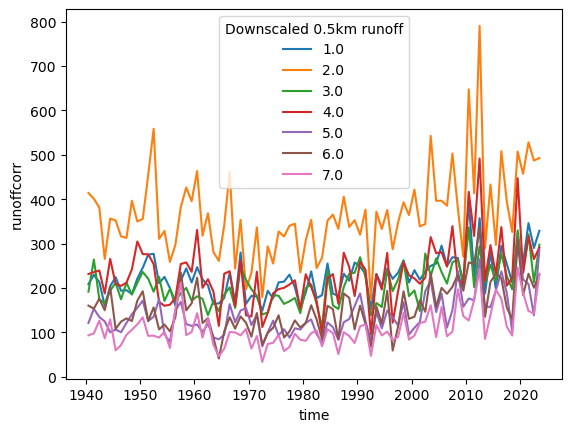

In [29]:
(dsRunoff500mMAR_GrIS_per_section/1e6).plot(hue = 'section_numbers_adjusted')

### Solid Discharge

In [174]:
dfGISDMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_D.csv", index_col=0, parse_dates=True)
dfErrorGISDMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_err.csv", index_col=0, parse_dates=True)
dfGIScoverageMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_coverage.csv", index_col=0, parse_dates=True)
filterCov =  (dfGIScoverageMankoff < 0.5).values

if (time_resolution == 'Monthly'):
    dfGISDMankoff = dfGISDMankoff/12
    dfErrorGISDMankoff = dfErrorGISDMankoff/12
elif (time_resolution == 'Annual'):
    dfGISDMankoff = dfGISDMankoff.groupby(dfGISDMankoff.index.year).mean()
    dfErrorGISDMankoff = dfErrorGISDMankoff.groupby(dfErrorGISDMankoff.index.year).mean()

# dfGISDMankoff.plot()



### Precipitation

In [11]:
# precipitation_annual = "/Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/precip.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz"
# ds_precip = xr.open_dataset(precipitation_annual, decode_times=False)
# decadal_year = ds_precip['time'].values
# ds_precip['time'] = pd.to_datetime(1958+decadal_year, format='%Y') +pd.to_timedelta(decadal_year%1*365, unit='d')


# masks1k = open_mask_1k()
# masks1k['x'] = ds_precip['x']
# masks1k['y'] = ds_precip['y']
# dsPrecipFjords = ds_precip["precipcorr"].where(masks1k["fjords"], np.nan)
# dsPrecipFjordsVol = volume(dsPrecipFjords, "1k").sum(dim=["x", "y"])


In [12]:
# dsPrecipFjords.to_netcdf(pathDataTemp + "RACMO2.3p2_1km_precip_fjords_Annual.nc")


In [13]:
# can you ask me if i'm sure i want to run this cell 

# check if file exists : pathDataTemp + "RACMO2.3p2_1km_total_precip_fjords.nc"



# if (os.path.isfile(pathDataTemp + "RACMO2.3p2_1km_total_precip_fjords.nc")):
#     dsPrecipFjordsVol = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1km_total_precip_fjords.nc")
#     dsPrecipFjordsVol = dsPrecipFjordsVol['precipcorr'] 
# else:
#     dsPrecipMonth = read_RACMO("1k",time_resolution, years, variable="precip")
#     masks1k = open_mask_1k()
#     masks1k['x'] = dsPrecipMonth['x']
#     masks1k['y'] = dsPrecipMonth['y']
#     dsPrecipFjords = dsPrecipMonth["precipcorr"].where(masks1k["fjords"], np.nan)
#     dsPrecipFjords.to_netcdf(pathDataTemp + "RACMO2.3p2_1km_precip_fjords.nc")
    
#     dsPrecipFjordsVol = volume(dsPrecipFjords, "1k").sum(dim=["x", "y"])

file_annual_fjord = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1km_precip_fjords_Annual_1958_2023.nc"


dsPrecipFjordsVol = xr.open_dataset(file_annual_fjord)
dsPrecipFjordsVolSum  =dsPrecipFjordsVol.sum(dim=["x", "y"]).resample(time='YS').sum()

#### CARRA

In [14]:
ds_precip_carra_1991_2023_sum = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2023.1km.YY.fjords_only.sum_per_basin.nc")

In [15]:
dsPrecipFjordsCARRA_Annual_Sum = ds_precip_carra_1991_2023_sum.sum(dim="section_numbers_adjusted")/1e6

## Greenland - combined

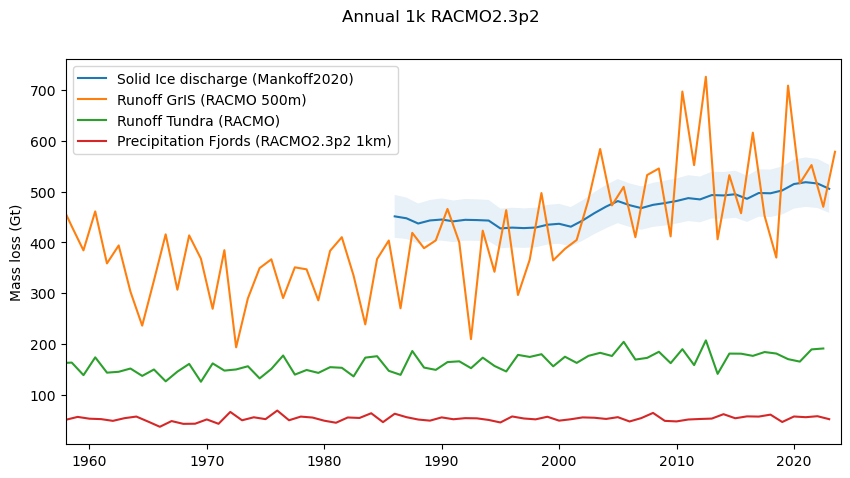

In [16]:
# now make a plot with the runoff and the precipitation and the Mankoff data


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.fill_between(pd.to_datetime(dfGISDMankoff.index, format='%Y'), (dfGISDMankoff - dfErrorGISDMankoff.values).squeeze().to_numpy(),(dfGISDMankoff + dfErrorGISDMankoff.values).squeeze().to_numpy(), alpha=0.1)
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, label='Solid Ice discharge (Mankoff2020)')
# ax.plot(dsRunoffIce.time, dsRunoffIce.sum(dim=['x', 'y']), label="Runoff Ice (RACMO)")
ax.plot(dsRunoff500mRACMO_sum.time, dsRunoff500mRACMO_sum['runoffcorr'], label="Runoff GrIS (RACMO 500m)")
ax.plot(dsRunoffTundra.time, dsRunoffTundra.sum(dim=[dict_coords['Tundra']['x'], dict_coords['Tundra']['y']]), label="Runoff Tundra (RACMO)")
ax.plot(dsPrecipFjordsVolSum.time, dsPrecipFjordsVolSum['precipcorr'], label="Precipitation Fjords (RACMO2.3p2 1km)")

#xlim = ax.get_xlim()
ax.set_xlim([pd.Timestamp(years[0]+"-01-01"), pd.Timestamp(years[-1]+"-12-31")])
ax.set_ylabel("Mass loss (Gt)")
ax.legend()
fig.suptitle(f"{time_resolution} {spatial_resolution} RACMO2.3p2")
plt.show()

## Annual timeseries 

In [17]:
for ds in [dsRunoff500mRACMO_GrIS_sum, dsRunoff500mRACMO_GIC_sum, dsRunoff500mMAR_GrIS_sum, dsRunoff500mMAR_GIC_sum]:
    ds = ds.resample(time='YS').sum()

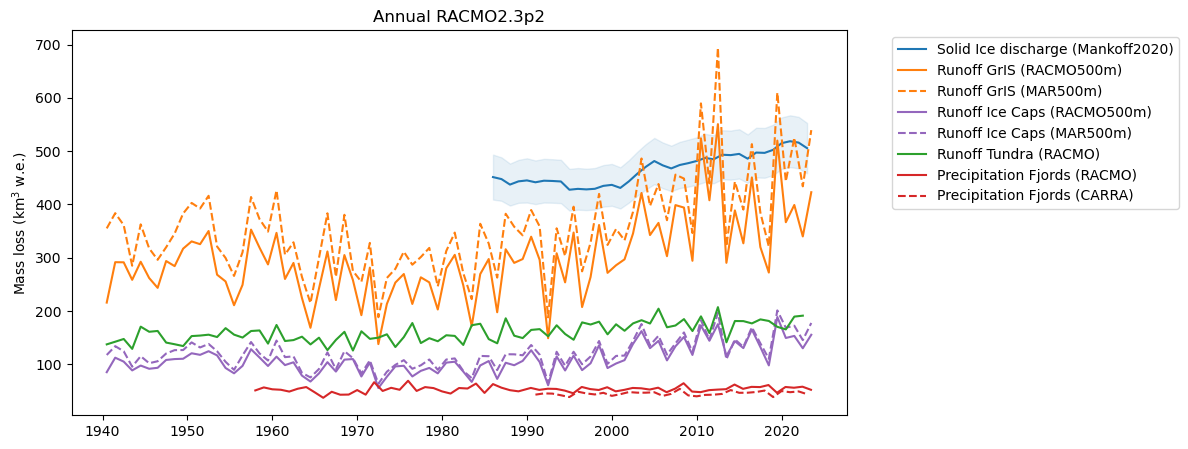

In [18]:
# now make a plot with the runoff and the precipitation and the Mankoff data


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
FW_type = ["Solid", "IceRun", "Tundra", "Precip", "IceCap"]
dictFWcolor = dict(zip(FW_type, colors))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.fill_between(pd.to_datetime(dfGISDMankoff.index, format='%Y'), (dfGISDMankoff - dfErrorGISDMankoff.values).squeeze().to_numpy(),(dfGISDMankoff + dfErrorGISDMankoff.values).squeeze().to_numpy(), alpha=0.1, color = dictFWcolor['Solid'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])
ax.plot(dsRunoff500mRACMO_GrIS_sum.time, dsRunoff500mRACMO_GrIS_sum['runoffcorr'], label="Runoff GrIS (RACMO500m)", color=dictFWcolor['IceRun'])
ax.plot(dsRunoff500mMAR_GrIS_sum.time, dsRunoff500mMAR_GrIS_sum['runoffcorr'], label="Runoff GrIS (MAR500m)", color=dictFWcolor['IceRun'], linestyle ="--")
ax.plot(dsRunoff500mRACMO_GIC_sum.time, dsRunoff500mRACMO_GIC_sum['runoffcorr'], label="Runoff Ice Caps (RACMO500m)", color=dictFWcolor['IceCap'])
ax.plot(dsRunoff500mMAR_GIC_sum.time, dsRunoff500mMAR_GIC_sum['runoffcorr'], label="Runoff Ice Caps (MAR500m)", color=dictFWcolor['IceCap'], linestyle ="--")
ax.plot(dsRunoffTundra.time, dsRunoffTundra.sum(dim=['x', 'y']), label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])
ax.plot(dsPrecipFjordsVol.time, dsPrecipFjordsVolSum['precipcorr'], label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])
ax.plot(dsPrecipFjordsCARRA_Annual_Sum.time, dsPrecipFjordsCARRA_Annual_Sum['precip'], label="Precipitation Fjords (CARRA)", color=dictFWcolor['Precip'], linestyle="--")
# set xlim for first 1939 to 2024
# years_xlim = [2000, 2023]
# ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])


ax.set_ylabel(r"Mass loss (km$^3$ w.e.)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title(f"{time_resolution} RACMO2.3p2")
# save as png
pathFigures = pathGithubFolder+ "results/figures/"

# plt.savefig(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_{years_xlim[0]}-{years_xlim[1]}.png", dpi=300, bbox_inches='tight')

plt.show()

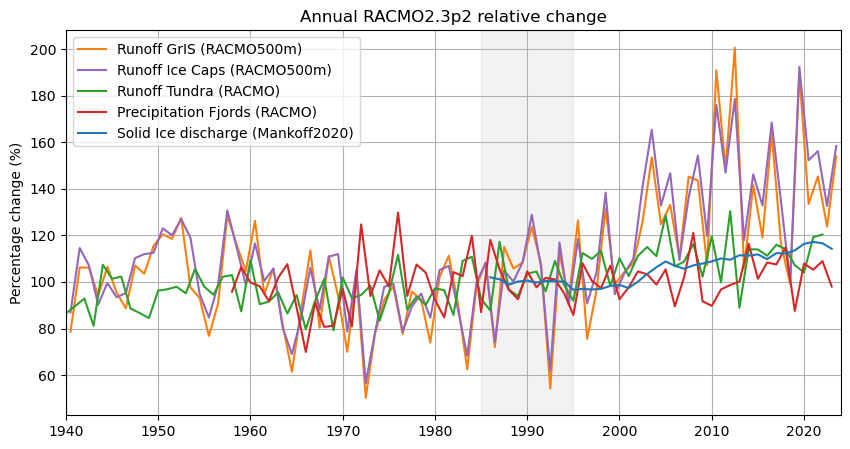

In [19]:
# Calculate the 10-year average
avg_10yr_RACMO = dsRunoff500mRACMO_GrIS_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_RACMO_GIC = dsRunoff500mRACMO_GIC_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Tundra = dsRunoffTundraSum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Precip = dsPrecipFjordsVolSum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Solid = dfGISDMankoff.loc[1985:1995].mean()

# Calculate the percentage change
pct_change_RACMO = (dsRunoff500mRACMO_GrIS_sum ) / avg_10yr_RACMO * 100
pct_change_RACMO_GIC = (dsRunoff500mRACMO_GIC_sum ) / avg_10yr_RACMO_GIC * 100
pct_change_Tundra = (dsRunoffTundraSum ) / avg_10yr_Tundra * 100
pct_change_Precip = (dsPrecipFjordsVolSum ) / avg_10yr_Precip * 100
pct_change_Solid = (dfGISDMankoff ) / avg_10yr_Solid * 100

# Plot the percentage change
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(pct_change_RACMO.time, pct_change_RACMO['runoffcorr'], label="Runoff GrIS (RACMO500m)", color=dictFWcolor['IceRun'])
ax.plot(pct_change_RACMO_GIC.time, pct_change_RACMO_GIC['runoffcorr'], label="Runoff Ice Caps (RACMO500m)", color=dictFWcolor['IceCap'])
ax.plot(pct_change_Tundra.time, pct_change_Tundra, label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])
ax.plot(pct_change_Precip.time, pct_change_Precip['precipcorr'], label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'),  pct_change_Solid, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])

# shade area between 1985 and 1995
ax.axvspan(pd.Timestamp('1985-01-01'), pd.Timestamp('1994-12-31'), color='gray', alpha=0.1)


years_xlim = [1940, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])
ax.set_ylabel("Percentage change (%)")
ax.legend()
ax.set_title(f"{time_resolution} RACMO2.3p2 relative change")

ax.grid()
plt.show()

Combine data

In [20]:
dfRunoffTundra = dsRunoffTundraSum.squeeze().to_dataframe(name='Runoff Tundra').drop(columns='height')
# dfRunoffIce = dsRunoffIce.sum(dim=['rlon', 'rlat']).squeeze().to_dataframe(name='Runoff Ice').drop(columns='height')
dfRunoffRACMOGrIS = dsRunoff500mRACMO_GrIS_sum['runoffcorr'].squeeze().to_dataframe(name='Runoff GrIS')
dfRunoffRACMOGIC = dsRunoff500mRACMO_GIC_sum['runoffcorr'].squeeze().to_dataframe(name='Runoff Ice Caps')
dfPrecipFjordsVol = dsPrecipFjordsVolSum['precipcorr'].to_dataframe(name='Precipitation Fjords')
dfSolidMankoff = dfGISDMankoff.copy(deep=True)

if time_resolution == 'Annual':
    for df in [dfRunoffTundra, dfRunoffRACMOGrIS, dfRunoffRACMOGIC]:  df.index = df.index.year
    dfPrecipFjordsVol = dfPrecipFjordsVol.groupby(dfPrecipFjordsVol.index.year).mean()

elif time_resolution == 'Monthly':
   for df in [dfRunoffTundra, dfRunoffIce, dfPrecipFjordsVol,]:  df.index = df.index.strftime('%Y-%m')
   dfSolidMankoff.index = pd.to_datetime(dfSolidMankoff.index)
   dfSolidMankoff = dfSolidMankoff.groupby(dfSolidMankoff.index.strftime('%Y-%m')).mean()
#    dfPrecipFjordsVol = dfPrecipFjordsVol.groupby(dfPrecipFjordsVol.index.strftime('%Y-%m')).mean()

df_sum_GIS_55 = pd.concat([dfSolidMankoff, dfRunoffRACMOGrIS,dfRunoffRACMOGIC, dfRunoffTundra,  dfPrecipFjordsVol, ], axis=1).sort_index()

if time_resolution == 'Monthly':
    df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format='%Y-%m')
else:
    df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format='%Y')

In [21]:
filterNanMonths = df_sum_GIS_55.isna().sum(axis=1)>0  # find months with NaN values in any of the variables
df_sum_GIS_55Relative = ((df_sum_GIS_55.mask(filterNanMonths).T/df_sum_GIS_55.sum(axis=1)).T)

In [22]:
df_sum_GIS_55['2018':'2023']
df_sum_GIS_55['2018':'2023'].sum(axis=1)


2018-01-01    1109.545801
2019-01-01    1428.120099
2020-01-01    1254.163019
2021-01-01    1316.619527
2022-01-01    1235.638438
2023-01-01    1136.291957
dtype: float64

In [23]:
df_sum_GIS_55.columns

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
FW_type_long = ['Discharge [Gt yr-1]', 'Runoff GrIS', 'Runoff Tundra',
       'Precipitation Fjords', 'Runoff Ice Caps']
dictFWcolor_long = dict(zip(FW_type_long, colors))


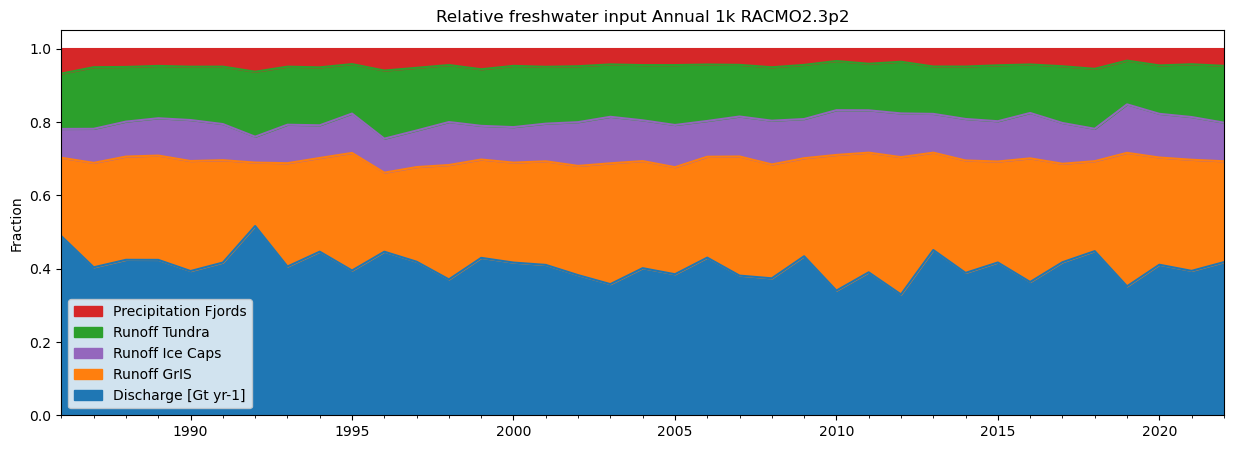

p-value for Discharge [Gt yr-1] trend: 0.032842282207943635
p-value for Runoff GrIS trend: 0.02005443455395956
p-value for Runoff Ice Caps trend: 0.00027825530204336323
p-value for Runoff Tundra trend: 0.005264164100593359
p-value for Precipitation Fjords trend: 0.0014993926104580927


In [24]:
import matplotlib.dates as mdates
from scipy import stats

fig,ax = plt.subplots( figsize=(15, 5))
# df_sum_GIS_55.plot(kind='line', subplots=True, figsize=(10, 6))
# set colors according to dictFWcolor

df_sum_GIS_55Relative['1986':'2022'].plot(kind='area',stacked=True, ax=ax,color=[dictFWcolor_long[FW] for FW in df_sum_GIS_55Relative.columns])

# df_sum_GIS_55Relative.plot(kind='bar', ax=ax, stacked=True)
# max 10 ticklabels

# update figsize
# plt.subplots( figsize=(15, 5))
# plt.xticks(rotation=45)
plt.title(f"Relative freshwater input {time_resolution} {spatial_resolution} RACMO2.3p2")
plt.ylabel("Fraction")
# do legend inverse
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()

import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Add linear trend
for col in df_sum_GIS_55Relative.columns:
    x = df_sum_GIS_55Relative.index.year
    y = df_sum_GIS_55Relative[col].values*100

    x= x[~np.isnan(y)]
    y= y[~np.isnan(y)]

    # Add the original data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col, line=dict(color=dictFWcolor_long[col])))
    
    # Calculate the linear trend
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'p-value for {col} trend: {p_value}')
    
    # Add the trendline
    fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f}%/decade \np={p_value:.3f}', line=dict(color=dictFWcolor_long[col], dash='dash')))

# update lyaout to plotly white
fig.update_layout(template='plotly_white', title=f"Relative FW input {time_resolution} RACMO2.3p2", width = 1000, height = 500)
fig.show()

# Per sector

In [15]:
def kgperm2_to_Gt(ds):
    ds = ds/1e6
    ds.attrs['units'] = 'Gt'
    return ds

In [16]:
# cmc.roma.colors
# get 8 colors from the roma colormap
colors = cmc.roma.colors
colors = [colors[i] for i in range(0, len(colors), len(colors)//8)]
colors_hex_Moug = [mcolors.rgb2hex(color) for color in colors]
dict_Moug_colors = dict(zip(np.arange(8), colors))


In [18]:

# ice_caps = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_Ice_Caps.nc")

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ice_caps['runoff'].plot(x='time', ax=ax, hue = 'Basins', linestyle='--')
# plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-12-31'))

In [19]:
def mask_MougBasins_ice(ds, IceOrTundra):
    '''Mask the RACMO data with the Mouginot basins and sum the values for each basin
    IceOrTundra: "Ice" or "Tundra" to select the mask to use'''
    if spatial_resolution == '5_5k':

        mask55 = open_mask_5_5k(spatial_resolution)
        mask55['rlat'] = ds['rlat']
        mask55['rlon'] = ds['rlon']

        if IceOrTundra == 'Ice':
            ds['Basins'] = mask55['Basins']
            dsMougTime = ds.groupby('Basins').sum().isel(height=0)
        elif IceOrTundra == 'Tundra':
            ds['Basins'] = mask55['Mouginot_Tundra']
            dsMougTime = ds.groupby('Basins').sum().isel(height=0)
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime
        
    elif spatial_resolution == '1k':
        if not 'masks1k' in globals():
            mask1k = open_mask_1k()
        path_mask_1k_with_tundra = "/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/GrIS_topo_icemask_lsm_tundra_basins_lon_lat_1km.nc"
        mask_1k_with_tundra = xr.open_dataset(path_mask_1k_with_tundra)
        if IceOrTundra == 'Ice':
            ds['Basins'] = mask_1k_with_tundra['Basins_All_Greenland']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        elif IceOrTundra == 'Tundra':
            ds['Mouginot_basins'] = mask_1k_with_tundra['Tundra_basins']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        # give a attribute
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime


dict_Moug = {0:"Not GRIS", 1: "NO", 2: "NE", 3: "CE", 4: "SE", 5: "SW", 6: "CW", 7: "NW"}

### Runoff ice sheet

<Axes: title={'center': 'Liquid Runoff Ice Sheet per sector 2010-2012'}, xlabel='time'>

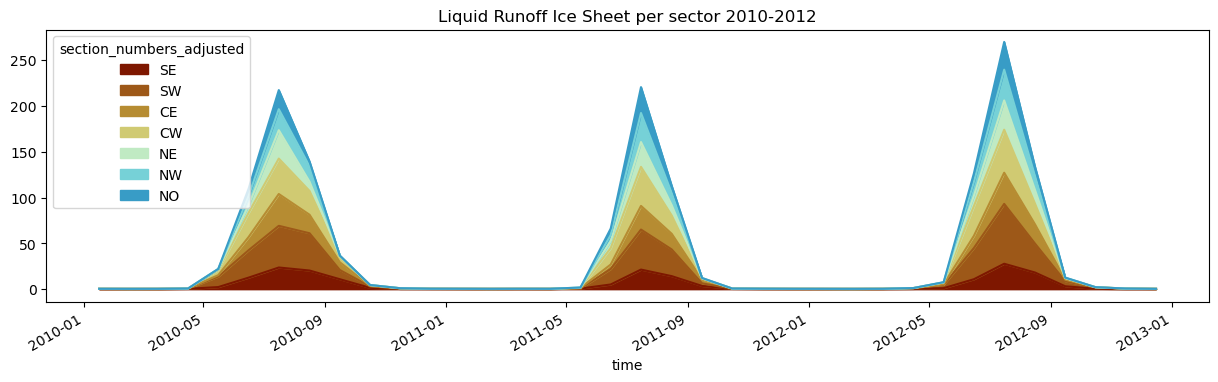

In [55]:
# dsRunoffIceSector = pathAnnekeFolderIMAU02+ "/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_GrIS_Ice.nc"
# dsRunoffIceSector = xr.open_dataset(dsRunoffIceSector)['runoff']
dsRunoffIceSectormm = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_GrIS.1990-2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.GrIS.section_sum.nc")['runoffcorr']
dsRunoffIceSector = kgperm2_to_Gt(dsRunoffIceSectormm)
dfRunoffIceSector = dsRunoffIceSector.to_dataframe(name='Liquid Runoff Ice Sheet').reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)

dfRunoffIceSector.columns = dfRunoffIceSector.columns.get_level_values(1)
dfRunoffIceSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title="Liquid Runoff Ice Sheet per sector 2010-2012")

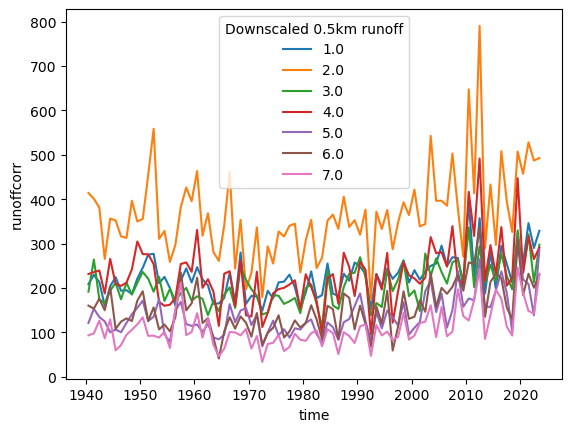

In [30]:
# if not in locals

if 'dsRunoff500mMAR_GrIS_per_section' not in locals():
    print("Opening the data")
    # dsRunoff500mMAR_GrIS_per_section = xr.open_dataset(path_sums_masks_500m+ "runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.per_section.nc")
(dsRunoff500mMAR_GrIS_per_section/1e6).plot(hue = 'section_numbers_adjusted')
# add attributes km3 w.e. per year
dsRunoff500mMAR_GrIS_per_section.attrs['units'] = 'km3 w.e. per year'
dsRunoff500mMAR_GrIS_per_section.attrs['Description'] = 'Sum per sector of the Greenland Ice Sheet for the 500m MAR3.14 data'


### Runoff Ice caps

<Axes: title={'center': 'Liquid Runoff Ice Caps'}, xlabel='time'>

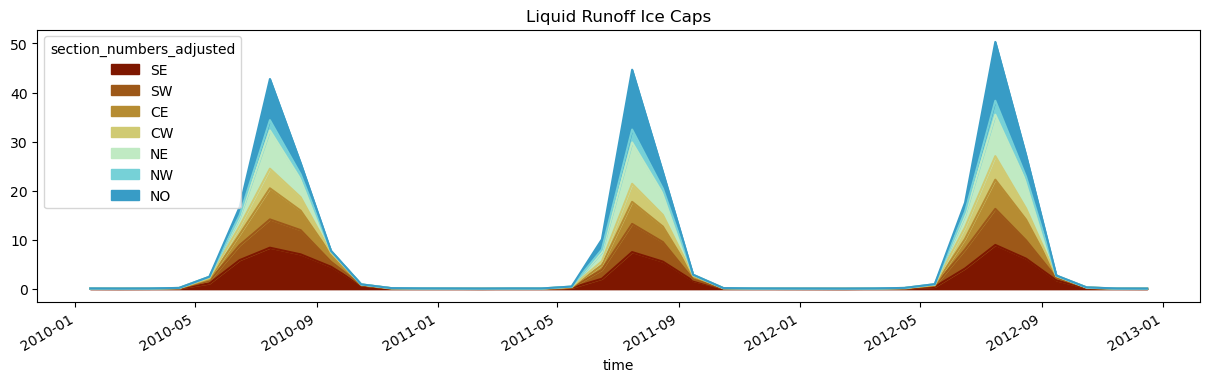

In [56]:
dsRunoffIceCapSectormm = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_GIC.1990-2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.GIC.section_sum.nc")['runoffcorr']
dsRunoffIceCapSector = kgperm2_to_Gt(dsRunoffIceCapSectormm)
dfRunoffIceCapSector = dsRunoffIceCapSector.to_dataframe(name='Liquid Runoff Ice Sheet').reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfRunoffIceCapSector.columns = dfRunoffIceCapSector.columns.get_level_values(1)

dfRunoffIceCapSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title = "Liquid Runoff Ice Caps")



In [36]:
if 'dsRunoff500mMAR_GIC_per_section' not in locals():
    print("Opening the data")
    dsRunoff500mMAR_GIC_per_section = xr.open_dataset(path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GIC.0.5km.GIC.YY.per_section.nc")
dsRunoff500mMAR_GIC_per_section

# add units
dsRunoff500mMAR_GIC_per_section.attrs['units'] = 'km3 w.e. per year'
dsRunoff500mMAR_GIC_per_section.attrs['Description'] = 'Sum per sector of the Greenland Ice Caps for the 500m MAR3.14 data'

In [87]:
dfRunoff500mMAR_GIC_per_section = dsRunoff500mMAR_GIC_per_section['runoffcorr'].to_dataframe().reset_index()
dfRunoff500mMAR_GIC_per_section['section_numbers_adjusted'] = dfRunoff500mMAR_GIC_per_section['section_numbers_adjusted'].map(dict_sections)
dfRunoff500mMAR_GIC_per_section = dfRunoff500mMAR_GIC_per_section.set_index('time').pivot(columns='section_numbers_adjusted')/1e6
dfRunoff500mMAR_GIC_per_section.columns = dfRunoff500mMAR_GIC_per_section.columns.get_level_values(1)


### Runoff Tundra

Make tundra section mask 

In [57]:
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24_copy.nc"
mask = xr.open_dataset(fname)
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc"
mask1 = xr.open_dataset(fname)
mask_tundra = mask1['LSM'].where(mask1['Promicemask'] == 0)
mask['Tundra_sections'] = mask['section_numbers_adjusted'].where(mask_tundra.values == 1)
mask_tundra_sections = mask['Tundra_sections']
mask_tundra_sections = mask_tundra_sections.rename({'x':'rlon', 'y':'rlat'})


Import monthly data

In [23]:
time_resolution = 'Monthly'
years = list(range(2012, 2023))

dsRunoffTundra_mmyear = read_RACMO('1k_reproject', time_resolution,years=years, variable="runoff")

# rename x and y to rlon and rlat
dsRunoffTundra_mmyear['Tundra_basins'] = mask_tundra_sections
path_monthly_racmo = pathAnnekeFolderIMAU02+ "/Downscaling_GR/Monthly/"
fname_runofftundraMM = f"runoff_tundra.{years[0]}-{years[1]}.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.tundra.section_sum.nc"

if os.path.isfile(path_monthly_racmo +fname_runofftundraMM):
    dsRunoffTundra_mmyear_SECTOR = xr.open_dataset(path_monthly_racmo +fname_runofftundraMM)
else:
    dsRunoffTundra_mmyear_SECTOR =  dsRunoffTundra_mmyear['runoff'].groupby(dsRunoffTundra_mmyear['Tundra_basins']).sum().drop('height')
    dsRunoffTundra_mmyear_SECTOR.to_netcdf(path_monthly_racmo +fname_runofftundraMM)


    

Reading locally reprojected 1k data
Finished reading locally reprojected 1k data


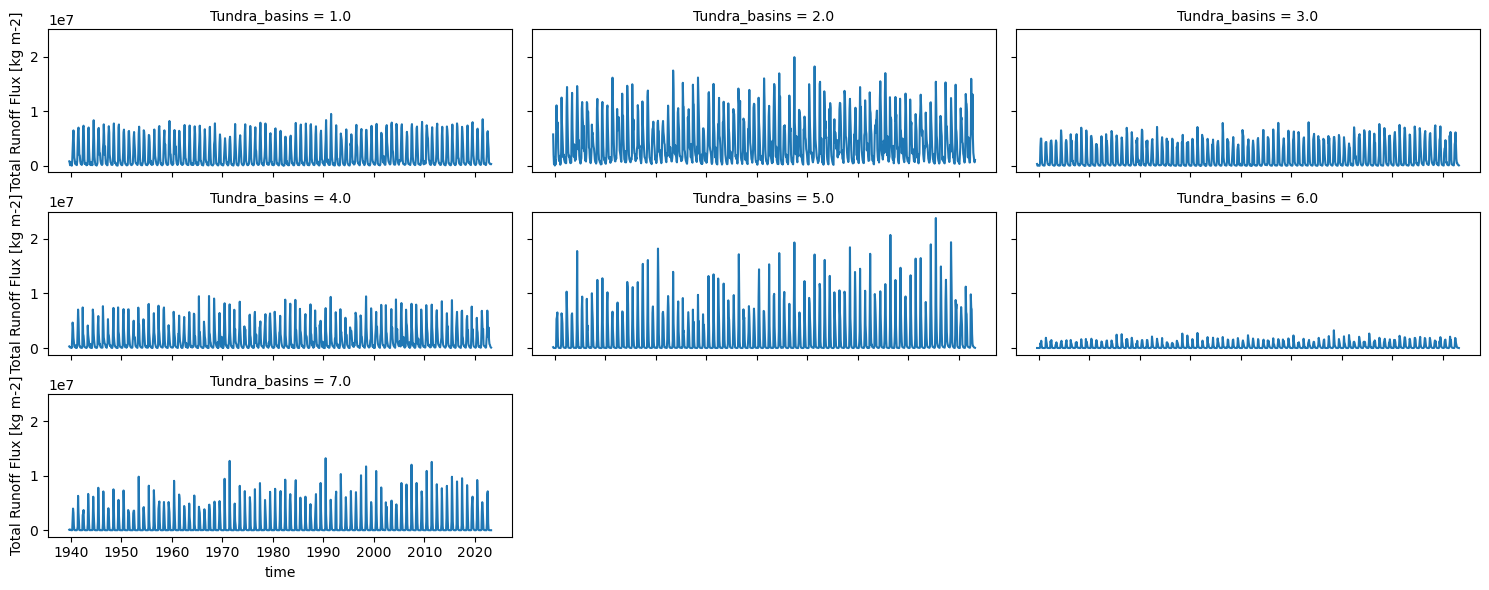

In [24]:
dsRunoffTundra_mmyear_SECTOR['runoff'].plot(x='time', col='Tundra_basins',  col_wrap=3, figsize = (15,6))

Convert tundra from mm to km3 

In [58]:
dfRunoffTundraSector = kgperm2_to_Gt( dsRunoffTundra_mmyear_SECTOR['runoff']).to_dataframe().reset_index().drop(columns='height').set_index('time').pivot(columns='Tundra_basins').rename(columns=dict_sections)

dfRunoffTundraSector.columns = dfRunoffTundraSector.columns.get_level_values(1)
# dfRunoffTundraSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title = "Liquid Runoff Tundra")


## Solid discharge

In [43]:
dfSectionD = pd.read_csv(path_Mankoff2020Solid_adjusted + "section_D.csv", index_col=0, parse_dates=True)
dfErrorSectionDMankoff = pd.read_csv(path_Mankoff2020Solid_adjusted + "section_err.csv", index_col=0, parse_dates=True)
dfSectionCovManoff = pd.read_csv(path_Mankoff2020Solid_adjusted + "section_coverage.csv", index_col=0, parse_dates=True)
# filterCovReg =  (dfSectionCovManoff < 0.5).values

dfSectionD = dfSectionD/12
dfErrorSectionDMankoff = dfErrorSectionDMankoff/12
dfSectionD.columns.name = "Basins"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


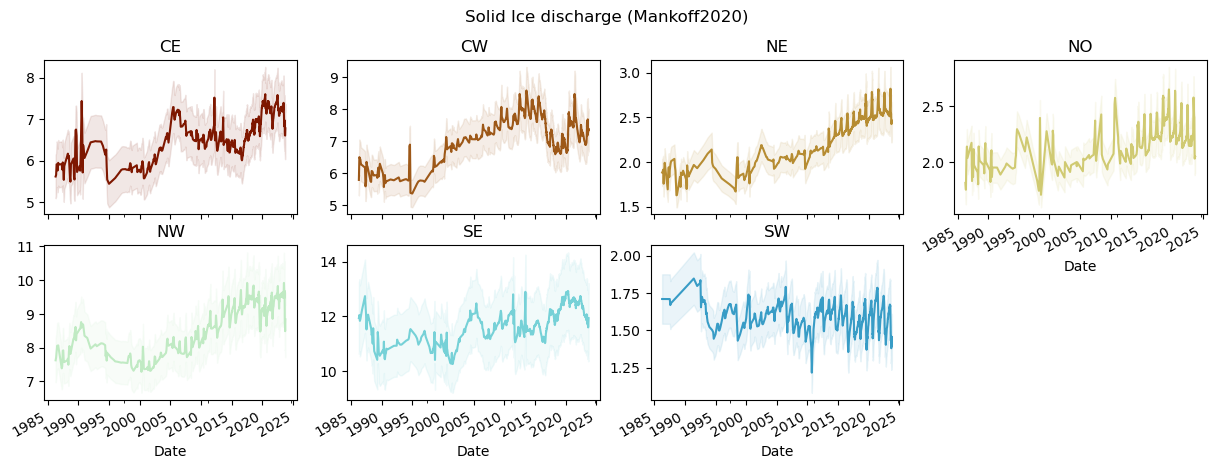

In [44]:
axs  = dfSectionD.plot(subplots=True,figsize=(15, 5), color=colors_hex_Moug, layout=(2, 4), sharex=True, legend=False, title="Solid Ice discharge (Mankoff2020)")

# also plot error as fill between
for i, ax in enumerate(axs.flatten()):
    if i == len(dict_Moug)-1:
        break
    ax.fill_between(dfSectionD.index, (dfSectionD.iloc[:,i] - dfErrorSectionDMankoff.iloc[:,i]).to_numpy(),(dfSectionD.iloc[:,i] + dfErrorSectionDMankoff.iloc[:,i]).to_numpy(), alpha=0.1, color=colors_hex_Moug[i])
    ax.set_title(dfSectionD.columns[i])
plt.legend()

# calculate monthly mean and standard deviation per region

## Precipitation

In [496]:
# open ds_precip_carra_1991_2023_sum.to_netcdf("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2023.1km.YY.fjords_only.sum_per_basin.nc")
ds_precip_carra_1991_2023_sum = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2023.1km.YY.fjords_only.sum_per_basin.nc")/1e6
ds_precip_carra_1991_2023_sum.resample(time='YS').sum()


folder_base = "/Volumes/imau02/rapid/Anneke/"


dsPrecipFjords = xr.open_mfdataset(pathDataTemp + "RACMO2.3p2_1km_precip_fjords_Annual_1958_2023.nc")
dsPrecipFjordsAnnualRACMO_58_23 = dsPrecipFjords.copy(deep=True)
mask_sections = (
    folder_base
    + "RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24.nc"
)
dsmask_sections = xr.open_mfdataset(mask_sections)
dsPrecipFjordsSectormm_sum = dsPrecipFjords.groupby(dsmask_sections['section_numbers_adjusted']).sum()
dsPrecipFjordsSectormm_sum = dsPrecipFjordsSectormm_sum.resample(time='YS').sum()

### Load Monthly

In [521]:
monthly_precip_cara1 = "/Volumes/imau02/rapid/Anneke/CARRA/Monthly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.2009-2023.1km.MM.fjords_only.per_basin.nc"
ds_precip_carra_2009_2023_month = xr.open_dataset(monthly_precip_cara1)/1e6

ds_precip_carra_1991_2008_month = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Monthly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2008.1km.MM.fjords_only.sum_per_basin.nc")/1e6

ds_precip_carra_1991_2023_month = xr.concat([ds_precip_carra_1991_2008_month, ds_precip_carra_2009_2023_month], dim='time')


In [507]:

ds_precip_racmo_1990_2023_sum_monthly = xr.open_mfdataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/fjords_only/precip.1990-2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.fjords_sector.nc")

In [523]:


dfPrecipFjordsSector_RACMO_year = dsPrecipFjordsSectormm_sum.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_RACMO_year.columns = dfPrecipFjordsSector_RACMO_year.columns.get_level_values(1)

dfPrecipFjordsSector_CARRA_year = ds_precip_carra_1991_2023_sum.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_CARRA_year.columns = dfPrecipFjordsSector_CARRA_year.columns.get_level_values(1)


In [524]:
dfPrecipFjordsSector_RACMO_month = ds_precip_racmo_1990_2023_sum_monthly.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_RACMO_month.columns = dfPrecipFjordsSector_RACMO_month.columns.get_level_values(1)

dfPrecipFjordsSector_CARRA_month = ds_precip_carra_1991_2023_month.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_CARRA_month.columns = dfPrecipFjordsSector_CARRA_month.columns.get_level_values(1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


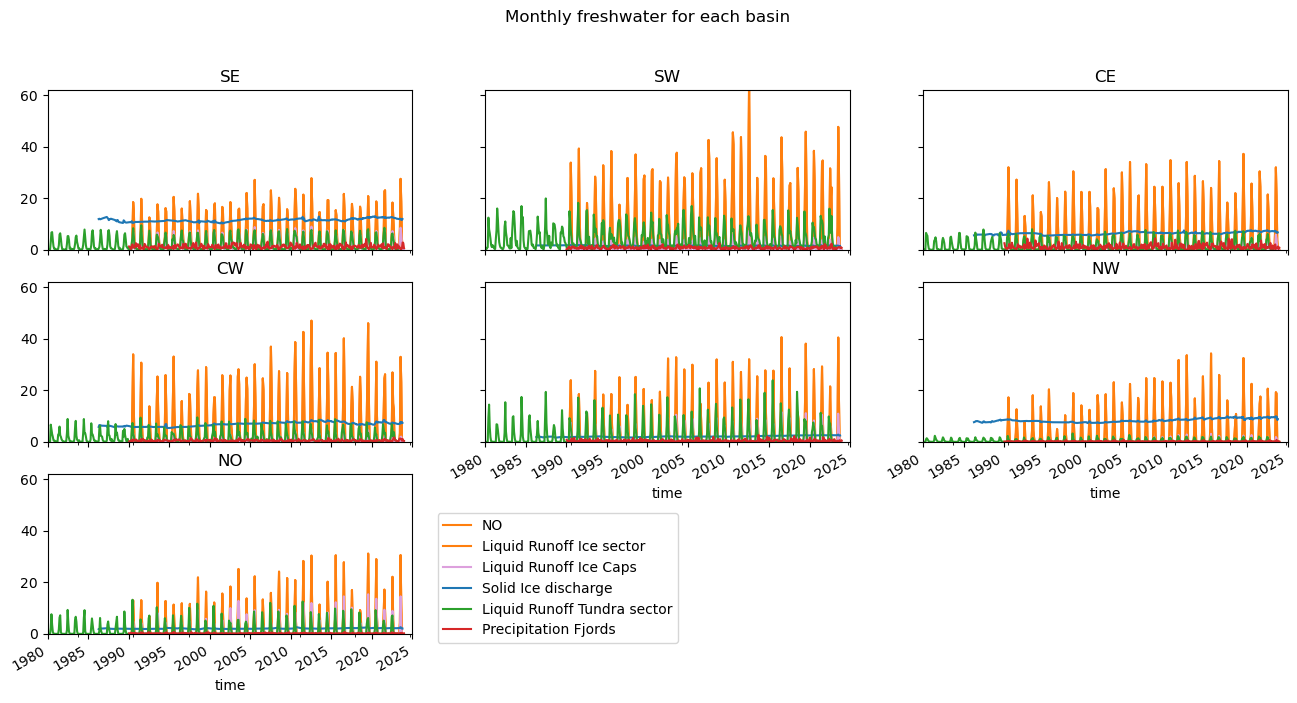

In [206]:
# fig, axs = plt.subplots(3, 3, figsize=(16, 8), sharex=True)

axs = dfRunoffIceSector.plot.line(color='tab:orange', subplots=True,layout=(3,3), figsize=(16, 8), legend=False, sharey=True, label="")

for i, basin in enumerate(dfRunoffIceSector.columns):
    basin_name = basin
    ax = axs.flatten()[i]
    
    dfRunoffIceSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Ice sector", color='tab:orange')
    dfRunoffIceCapSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Ice Caps", color='plum')
    (dfSectionD[basin_name]).plot.line( ax=ax, label="Solid Ice discharge", color='tab:blue')
    dfRunoffTundraSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Tundra sector", color='tab:green')
    dfPrecipFjordsSector_RACMO_month[basin_name].plot.line( ax=ax, label="Precipitation Fjords", color='tab:red')

    ax.title.set_text(basin_name)

fig = axs[0, 0].figure
# title Monthly freshwater for each basin
plt.suptitle(f"{time_resolution} freshwater for each basin")

if time_resolution == 'Monthly':
    ax.set_xlim([pd.to_datetime("2010-01-01"), pd.to_datetime(years[-1]) + pd.DateOffset(years=1)])
    ax.set_ylim([0, 62])
elif time_resolution == 'Annual':
    ax.set_xlim([pd.to_datetime(years[0]), pd.to_datetime(years[-1]) + pd.DateOffset(years=1)])
plt.legend()
axs.flatten()[6].legend(bbox_to_anchor=(1.05, -0.1), loc='lower left')
ax.set_xlim([pd.to_datetime("1980"), pd.to_datetime("2025")])
plt.show()

## Per sector - combined

In [40]:
open_previous = True

if open_previous:
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

else:


    dsSectorSum = xr.merge([ 
        dfRunoffIceSector.stack().to_xarray().to_dataset(name="Liquid Runoff Ice Sheet").rename({'section_numbers_adjusted':'Basins'}),
        dfRunoffIceCapSector.stack().to_xarray().to_dataset(name="Liquid Runoff Ice Caps").rename({'section_numbers_adjusted':'Basins'}),
        dfRunoffTundraSector.stack().to_xarray().to_dataset(name="Liquid Runoff Tundra").rename({'Tundra_basins':'Basins'}), 
        dfPrecipFjordsSector_RACMO_month.stack().to_xarray().to_dataset(name="Precipitation Fjords").rename({'section_numbers_adjusted':'Basins'}),
        dfPrecipFjordsSector_CARRA_month.stack().to_xarray().to_dataset(name="Precipitation Fjords CARRA").rename({'section_numbers_adjusted':'Basins'}),
    ]
    )
    # dsSectorSumD['Solid Ice discharge original'] = dfRegionDMankoff.stack().to_xarray()
    # dsSectorSum['Solid Ice discharge (interp)'] = dsSectorSum['Solid Ice discharge original'].interp(Date=dsSectorSum.time, method='linear')
    # # groupby month and mean
    # dsSectorSum['Solid Ice discharge (mean)'] = dsSectorSum['Solid Ice discharge original'].groupby('Date.month').mean()


    def compute_weighted_monthly_mean(data):
        # Calculate the weights as the difference between each date and the previous date

        diff_next = data.Date.diff('Date').shift(Date=-1).dt.days
        diff_prev = data.Date.diff('Date').dt.days
        diff = (diff_next + diff_prev) / 2
        weights = diff
        total_weights = weights.resample(Date='1ME').sum()

        # Compute the weighted mean
        weighted_data = data * weights
        weighted_sum = weighted_data.resample(Date='1ME').sum()
        weighted_mean = weighted_sum / total_weights
        weighted_mean['Date'] = weighted_mean.Date - pd.Timedelta(15, unit='D')
        return weighted_mean

    def compute_monthly_mean(data):
        return data.resample(Date='1ME').mean()

    dsSectorSum['Solid Ice discharge (weighted mean)'] = compute_weighted_monthly_mean(dfSectionD.stack().to_xarray()).interp(Date=dsSectorSum.time, method='nearest').drop('Date')

    #
    # export dsSectorSum to csv
    start = dsSectorSum.time[0].dt.strftime('%Y').values
    end = dsSectorSum.time[-1].dt.strftime('%Y').values
    dsSectorSum.to_netcdf(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_2024_06_13.nc")

dsSectorSum = dsSectorSum.where(dsSectorSum != 0)

In [119]:

# dsSectorSum.resample(time='MS').mean().to_dataframe().reset_index().set_index('time').to_csv(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_2024_06_12.csv")

(dsSectorSum.resample(time='YS').mean()*12).sum(dim='Basins').to_dataframe().reset_index().set_index('time').to_csv(pathDataTemp + f"Greenland_Sum_2024_06_12.csv")

In [318]:
# find data with the following pattern: pathDataTemp + f"RACMO2.3p2_1k_sector_sum_{start}_{end}.nc")
import glob

# Define the start and end
start = 'your_start_value'
end = 'your_end_value'

# Construct the pattern
pattern = pathDataTemp + f"RACMO2.3p2_1k_sector_sum_*.nc"

# Use glob to find files that match this pattern
matching_files = glob.glob(pattern)
print(matching_files)

['/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1k_sector_sum_2024_06_12.nc', '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1k_sector_sum_1939_2023_2024_06_12.nc', '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1k_sector_sum_1939_2023.nc']


In [319]:
# if we have loaded dsSectorSum in memory
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_1939_2023_2024_06_12.nc")

In [320]:
# select 'NO'
dsSectorSum.sel(Basins='NO').sum(dim='time')

<xarray.Dataset> Size: 40B
Dimensions:                              ()
Coordinates:
    Basins                               <U2 8B 'NO'
Data variables:
    Liquid Runoff Ice Sheet              float32 4B 1.02e+03
    Liquid Runoff Ice Caps               float32 4B 412.2
    Liquid Runoff Tundra                 float32 4B 1.187e+03
    Precipitation Fjords                 float32 4B 79.95
    Precipitation Fjords CARRA           float64 8B 25.4
    Solid Ice discharge (weighted mean)  float64 8B 1.148e+03

In [339]:
# Calculate the mean of each DataArray in the Dataset
means = {var: dsSectorSum[var].mean().item() for var in dsSectorSum.data_vars}

# Convert the means to a DataFrame
variables_sorted = pd.DataFrame(list(means.items()), columns=['Variable', 'Mean']).sort_values(by='Mean', ascending=False)["Variable"].values

dsSectorSum = dsSectorSum[variables_sorted]

In [325]:
# plot ds solid discharge
col_order_abs = ['Solid Ice Discharge', 'Precipitation Fjords',  'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps','Liquid Runoff Ice Sheet', ]
col_order_rel = ['Solid Ice Discharge',   'Liquid Runoff Ice Sheet', 'Liquid Runoff Ice Caps','Liquid Runoff Tundra','Precipitation Fjords', ]

#### Plot stacked percent

In [326]:
df_single_sector = dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns='Precipitation Fjords CARRA')
# if any is nan set all to nan

df_single_sector

Solid Ice discharge (weighted mean)  Liquid Runoff Ice Sheet  \
time                                                                       
1939-09-01                                  NaN                      NaN   
1939-10-01                                  NaN                      NaN   
1939-11-01                                  NaN                      NaN   
1939-12-01                                  NaN                      NaN   
1940-01-01                                  NaN                      NaN   
...                                         ...                      ...   
2023-08-01                             2.371944                11.433375   
2023-09-01                             2.049816                 0.039090   
2023-10-01                                  NaN                 0.003273   
2023-11-01                                  NaN                 0.002109   
2023-12-01                                  NaN                 0.002077   

            Liquid Runoff Tundra  Liquid Runoff Ice Caps  Precipitation Fjords  
time                                                                            
1939-09-01              0.097207                     NaN                   NaN  
1939-10-01              0.146965                     NaN                   NaN  
1939-11-01              0.044488                     NaN                   NaN  
1939-12-01              0.076175                     NaN                   NaN  
1940-01-01              0.010097                     NaN                   NaN  
...                          ...                     ...                   ...  
2023-08-01                   NaN                3.091218              0.241519  
2023-09-01                   NaN                0.070234              0.397057  
2023-10-01                   NaN                0.001348              0.098014  
2023-11-01                   NaN                0.001064              0.097343  
2023-12-01                   NaN                0.001119              0.152250  

[1012 rows x 5 columns]

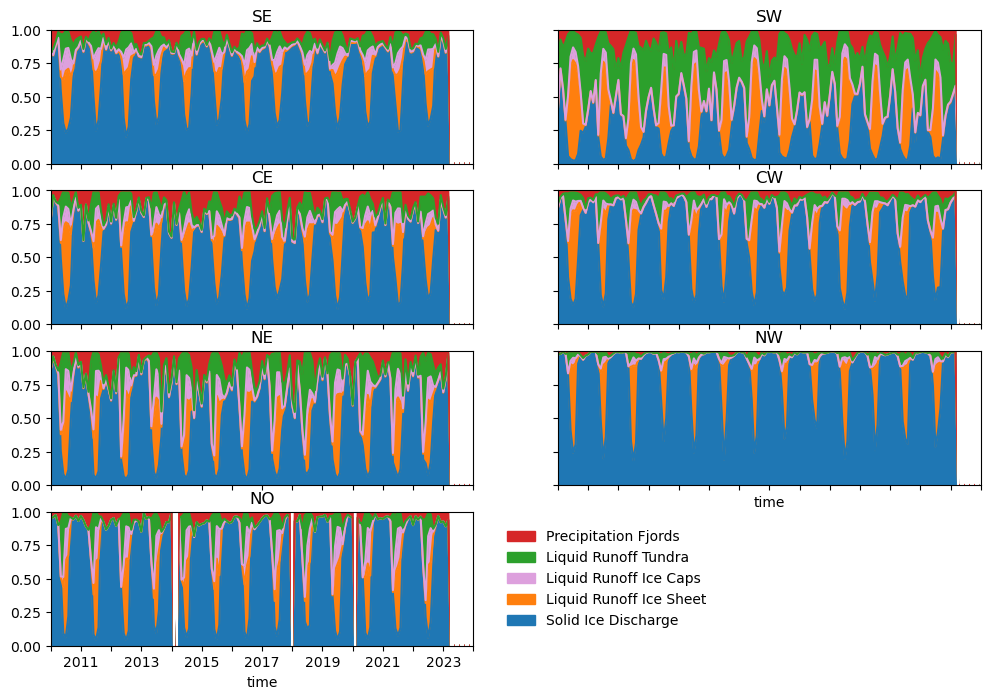

In [327]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 8), sharey=True)
fig.delaxes(axs.flatten()[7])
ylims = [0, 1]

lines, labels = [], []

# change labels of legend from Solid Ice discharge (weighted mean) to Solid Ice discharge 
dict_shorter_name = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'}
# extend 'Solid Ice discharge' with 'Solid Ice discharge'

for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns='Precipitation Fjords CARRA')
    # if any is nan set all to nan
    df_single_sector = df_single_sector.where(~df_single_sector.isna().any(axis=1), np.nan)
    nans = df_single_sector.isna().any(axis=1).index[df_single_sector.isna().any(axis=1)]

    # rename columns
    df_single_sector.columns = [dict_shorter_name.get(col, col) for col in df_single_sector.columns]
    df_single_sector = (df_single_sector.T/(df_single_sector.sum(axis=1).values)).T
    df_single_sector = df_single_sector[col_order_rel]
    df_single_sector.plot(kind='area', stacked=True,  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns])
    # scatter nans on y 1
    ax.vlines(nans, ylims[0], ylims[1], color='white',)


    ax.title.set_text(basin)
    ax.set_xticks(pd.date_range(start='2010', end='2024', freq='YS'))
    # ax.set_xtickla
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


# now delete last subplots
# and turn on xticklabels for ax 4, and 5 
# plt.subplots_adjust(hspace=0.5)
# remove line around legend
ax.set_ylim(ylims)


ax.set_xlim([pd.to_datetime("2010"), pd.to_datetime("2023") + pd.DateOffset(years=1)])


# Get the legend
legend = axs.flatten()[6].legend(bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=False)



handles, labels = axs.flatten()[6].get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels))

# Set the reversed handles and labels
axs.flatten()[6].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=False)
# axs.flatten()[6].legend(bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=False)

# 
# save figure
# plt.savefig(pathFigures + f"Relative_freshwater_per_sector_monthly_{start}_{end}_1k.png", dpi=300, bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Mass loss (Gt)')

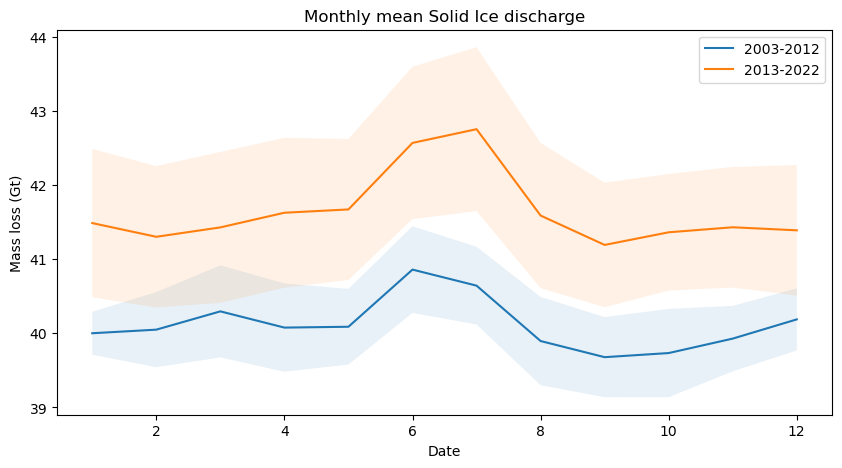

In [328]:



dfGISDMankoff2003_2012 = dfGISDMankoff['2003':'2012']
dfGISDMankoff2003_2012 = dfGISDMankoff2003_2012.groupby(dfGISDMankoff2003_2012.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISDMankoff2003_2012['std'] = dfGISDMankoff['2003':'2012'].groupby(dfGISDMankoff['2003':'2012'].index.month).std()

dfGISD_2013_2022 = dfGISDMankoff['2013':'2022']
dfGISD_2013_2022 = dfGISD_2013_2022.groupby(dfGISD_2013_2022.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISD_2013_2022['std'] = dfGISDMankoff['2013':'2022'].groupby(dfGISDMankoff['2013':'2022'].index.month).std()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

dfGISDMankoff2003_2012['mean'].plot( title='Monthly mean Solid Ice discharge', ax=ax, label = "2003-2012")
dfGISD_2013_2022['mean'].plot(ax=ax, label = "2013-2022")

ax.fill_between(dfGISDMankoff2003_2012.index, (dfGISDMankoff2003_2012['mean'] - dfGISDMankoff2003_2012['std']).to_numpy(),(dfGISDMankoff2003_2012['mean'] + dfGISDMankoff2003_2012['std']).to_numpy(), alpha=0.1)
ax.fill_between(dfGISD_2013_2022.index, (dfGISD_2013_2022['mean'] - dfGISD_2013_2022['std']).to_numpy(),(dfGISD_2013_2022['mean'] + dfGISD_2013_2022['std']).to_numpy(), alpha=0.1)
ax.legend( )
ax.set_ylabel("Mass loss (Gt)")

# data_mean_2002_2012['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISDMankoff2003_2012['mean'].values)
 

In [329]:
dsMonthlyGr

<xarray.Dataset> Size: 210kB
Dimensions:                  (time: 1192, Basins: 7)
Coordinates:
  * time                     (time) datetime64[ns] 10kB 1939-09-15T12:00:00 ....
  * Basins                   (Basins) <U2 56B 'SE' 'SW' 'CE' 'CW' 'NE' 'NW' 'NO'
Data variables:
    Solid Ice Discharge      (time, Basins) float64 67kB nan nan nan ... nan nan
    Liquid Runoff Ice Sheet  (time, Basins) float32 33kB nan nan ... 0.002077
    Liquid Runoff Ice Caps   (time, Basins) float32 33kB nan nan ... 0.001119
    Liquid Runoff Tundra     (time, Basins) float32 33kB 0.8174 5.76 ... nan nan
    Precipitation Fjords     (time, Basins) float32 33kB nan nan ... 0.1523

In [330]:
dict_colors_FW

{'Liquid Runoff Ice Sheet': 'tab:orange',
 'Liquid Runoff Ice Caps': 'plum',
 'Liquid Runoff Tundra': 'tab:green',
 'Precipitation Fjords': 'tab:red',
 'Solid Ice discharge (weighted mean)': 'tab:blue',
 'Solid Ice Discharge': 'tab:blue'}

Text(0, 0.5, 'Fraction')

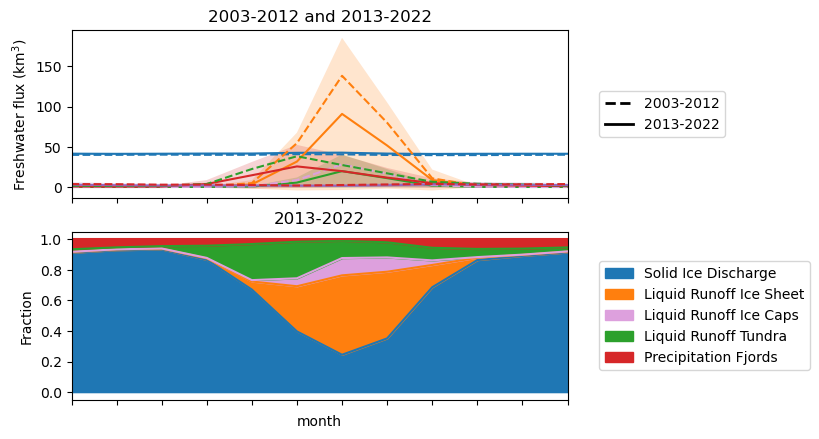

In [331]:
# make a list of all the names of data variables in dsSectorSum




from matplotlib.lines import Line2D
try:
    dsMonthlyGr =  dsSectorSum.copy(deep=True).drop('winter_year').drop('summer_year')
except:
    dsMonthlyGr =  dsSectorSum.copy(deep=True)

# make all 0 values nan
dsMonthlyGr = dsMonthlyGr.where(dsMonthlyGr != 0)
# rename to short names
dsMonthlyGr = dsMonthlyGr.rename(dict_shorter_name)
# only select col_order_rel
dsMonthlyGr = dsMonthlyGr[col_order_rel]

# Calculate the mean and standard deviation for each month
data_mean = dsMonthlyGr.sel(time=slice('2013','2022')).sum(dim='Basins').groupby('time.month').mean()
data_std = dsMonthlyGr.sel(time=slice('2013','2022')).sum(dim='Basins').groupby('time.month').std()
# do the same for 2002-2012
data_mean_2002_2012 = dsMonthlyGr.sel(time=slice('2003','2012')).sum(dim='Basins').groupby('time.month').mean()
data_std_2002_2012 = dsMonthlyGr.sel(time=slice('2003','2012')).sum(dim='Basins').groupby('time.month').std()

data_mean_2002_2012['Solid Ice Discharge'].values =np.squeeze(dfGISDMankoff2003_2012['mean'].values)
data_mean['Solid Ice Discharge'].values =np.squeeze(dfGISD_2013_2022['mean'].values)
data_std['Solid Ice Discharge'].values =np.squeeze(dfGISD_2013_2022['std'].values)
data_std_2002_2012['Solid Ice Discharge'].values =np.squeeze(dfGISDMankoff2003_2012['std'].values)

# Create a new figure
fig, axs = plt.subplots(2,1, sharex=True)

ax = axs[0]
# Loop over the data variables and plot each one with its standard deviation
for var in data_mean.data_vars:
    # Plot the mean
    data_mean[var].plot(ax=ax, label=var)#, color=dict_colors_FW[var])
    ax.fill_between(data_mean['month'], data_mean[var] - data_std[var], data_mean[var] + data_std[var], alpha=0.2)
    data_mean_2002_2012[var].plot(ax=ax, label=var, linestyle='--', color=dict_colors_FW[var])

handles = [Line2D([0], [0], color='black', linewidth=2, linestyle='--'),  # Dashed line for 2003-2012
           Line2D([0], [0], color='black', linewidth=2)]  # Solid line for 2013-2022
ax.legend(handles, ['2003-2012', '2013-2022'], bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_ylabel(r'Freshwater flux (km$^3$)')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_title('2003-2012 and 2013-2022')


# do the second in percentage and stacked area
ax = axs[1]
data_mean_perc = data_mean.to_dataframe()
data_mean_perc = (data_mean_perc.T/(data_mean_perc.sum(axis=1).values)).T
data_mean_perc.plot(kind='area', stacked=True, ax=ax, color=[dict_colors_FW[var] for var in data_mean_perc.columns])
ax.title.set_text('2013-2022')
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_xticks(np.arange(1, 13))
ax.set_xlim([1, 12])
ax.set_ylabel('Fraction')


### Seasonal cycle mean

In [132]:
dsSectorSeasonalCycle = dsSectorSum.copy(deep=True)#.drop('winter_year').drop('summer_year')
# linearly interpolate the Solid Ice discharge (weighted mean) to the same time as the other variables
dsSectorSeasonalCycle['Solid Ice Discharge'] = dsSectorSeasonalCycle['Solid Ice discharge (weighted mean)'].interp(time=dsSectorSeasonalCycle.time)

start_year ='2013'
end_year = '2022'  # the last year of the data (so including this year)

# Calculate the seasonal cycle of each DataArray in the Dataset

dsSectorSeasonalCycle2003_2012 = dsSectorSeasonalCycle.sel(time=slice("2002", "2011")).groupby('time.month').mean()

dsSectorSeasonalCycle1990_2000 = dsSectorSeasonalCycle.sel(time=slice("1990", "2000")).groupby('time.month').mean()

SE
SW
CE
CW
NE
NW
NO


In [113]:
pathDataProcessed = pathDataTemp.split('/temp')[0] + '/processed/'
pathDataProcessed

'/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/'

In [149]:

# dsSectorSeasonalCycle.sel(time=slice('2009', '2022')).groupby('time.month').mean().sum(dim='Basins').to_dataframe().drop(columns='Solid Ice discharge (weighted mean)').to_csv(pathDataProcessed + "Seasonal_Greenland_2009_2022.csv")

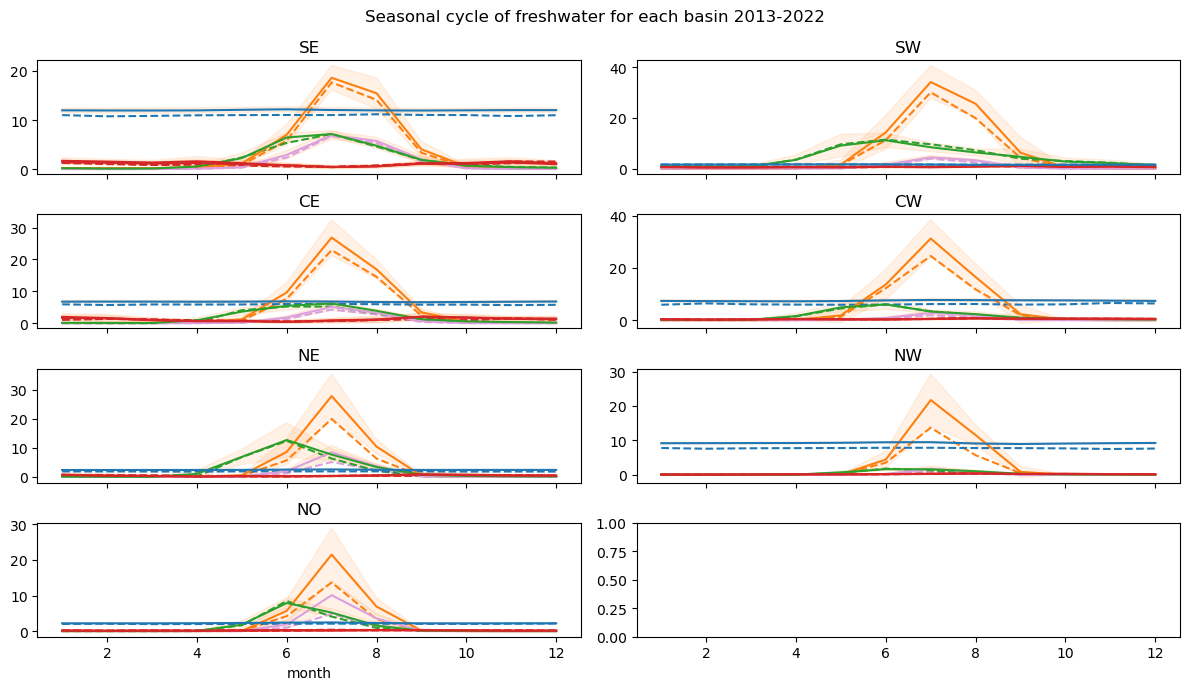

In [154]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dict_sections.values()):
    ax = axs[:].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector2003_2012 = dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector2003_2012.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    # ax.set_xlim([1, 12])
    # ax.set_xticks(np.arange(1, 13))


    # # rightrow
    # ax_right = axs[:,1].flatten()[i]
    # df_single_sector_change = df_single_sector-df_single_sector2003_2012
    # df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])

# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [160]:
axs[::2, 0].flatten()

array([<Axes: title={'center': 'SE'}, xlabel='month'>,
       <Axes: title={'center': 'CE'}, xlabel='month'>,
       <Axes: title={'center': 'NE'}, xlabel='month'>,
       <Axes: title={'center': 'NO'}, xlabel='month'>], dtype=object)

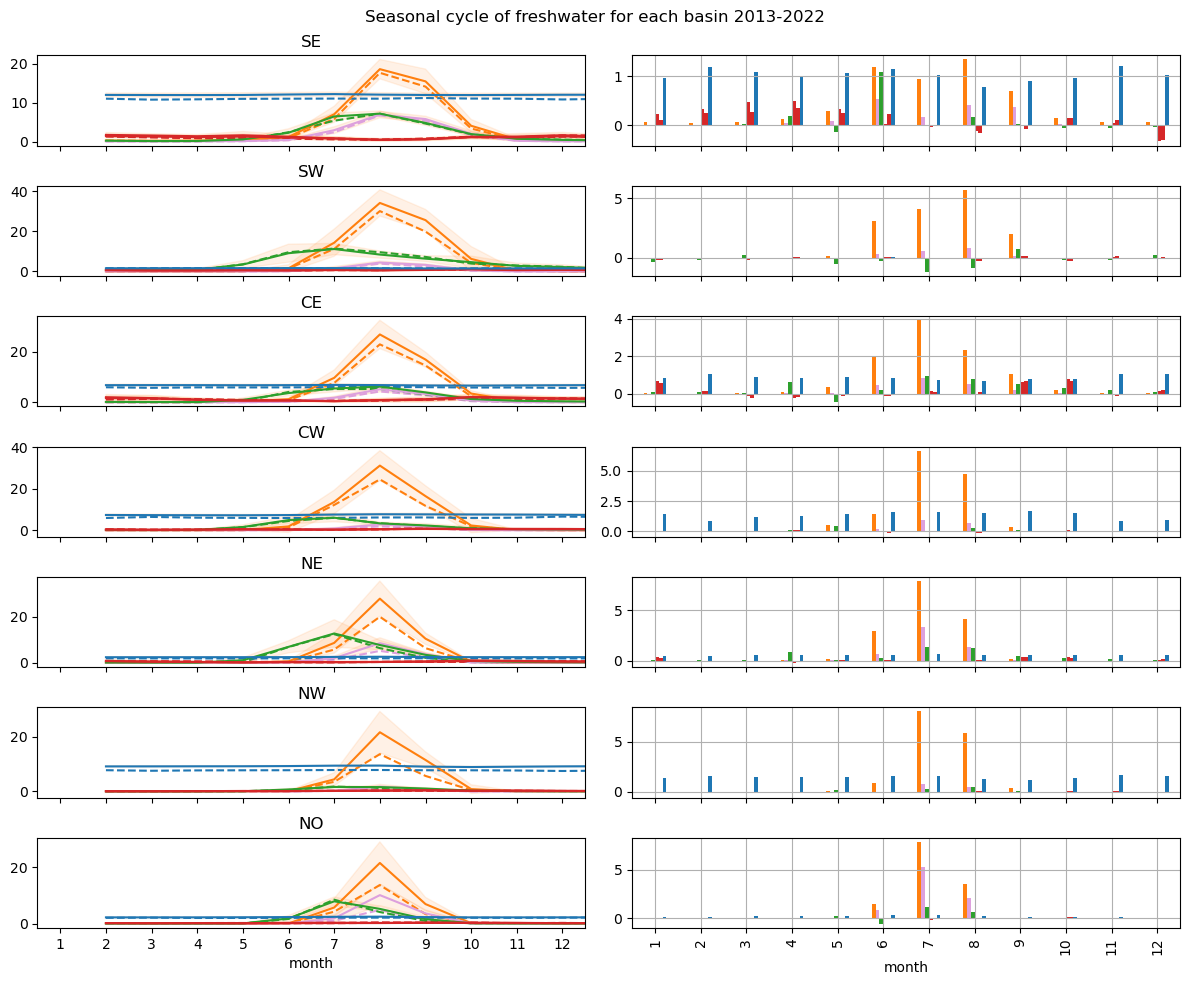

In [164]:
fig, axs = plt.subplots(7,2, sharex=True, figsize=(12, 10))
lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dict_sections.values()):
    ax = axs[:,0].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector2003_2012 = dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector2003_2012.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    # ax.set_xlim([1, 12])
    # ax.set_xticks(np.arange(1, 13))


    # rightrow
    ax_right = axs[:,1].flatten()[i]
    df_single_sector_change = df_single_sector-df_single_sector2003_2012
    df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])
    ax_right.grid()

# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [171]:
(df_single_sector[FW_sources_racm].T/df_single_sector[FW_sources_racm].sum(axis=1)).T

Liquid Runoff Ice Sheet  Liquid Runoff Ice Caps  Liquid Runoff Tundra  \
month                                                                          
1                     0.000628                0.000396              0.000380   
2                     0.000516                0.000344              0.000436   
3                     0.000564                0.000370              0.000294   
4                     0.001210                0.000729              0.010497   
5                     0.005023                0.004365              0.415554   
6                     0.314395                0.102462              0.435956   
7                     0.545724                0.255801              0.131744   
8                     0.471290                0.244991              0.105867   
9                     0.041908                0.014481              0.037790   
10                    0.001036                0.001091              0.016283   
11                    0.000769                0.000452              0.002099   
12                    0.000685                0.000434              0.000499   

       Precipitation Fjords  Solid Ice Discharge  
month                                             
1                  0.066320             0.932275  
2                  0.044893             0.953810  
3                  0.056917             0.941855  
4                  0.047559             0.940004  
5                  0.051603             0.523456  
6                  0.015735             0.131451  
7                  0.005152             0.061579  
8                  0.022317             0.155534  
9                  0.096800             0.809021  
10                 0.092187             0.889402  
11                 0.053989             0.942691  
12                 0.060751             0.937631

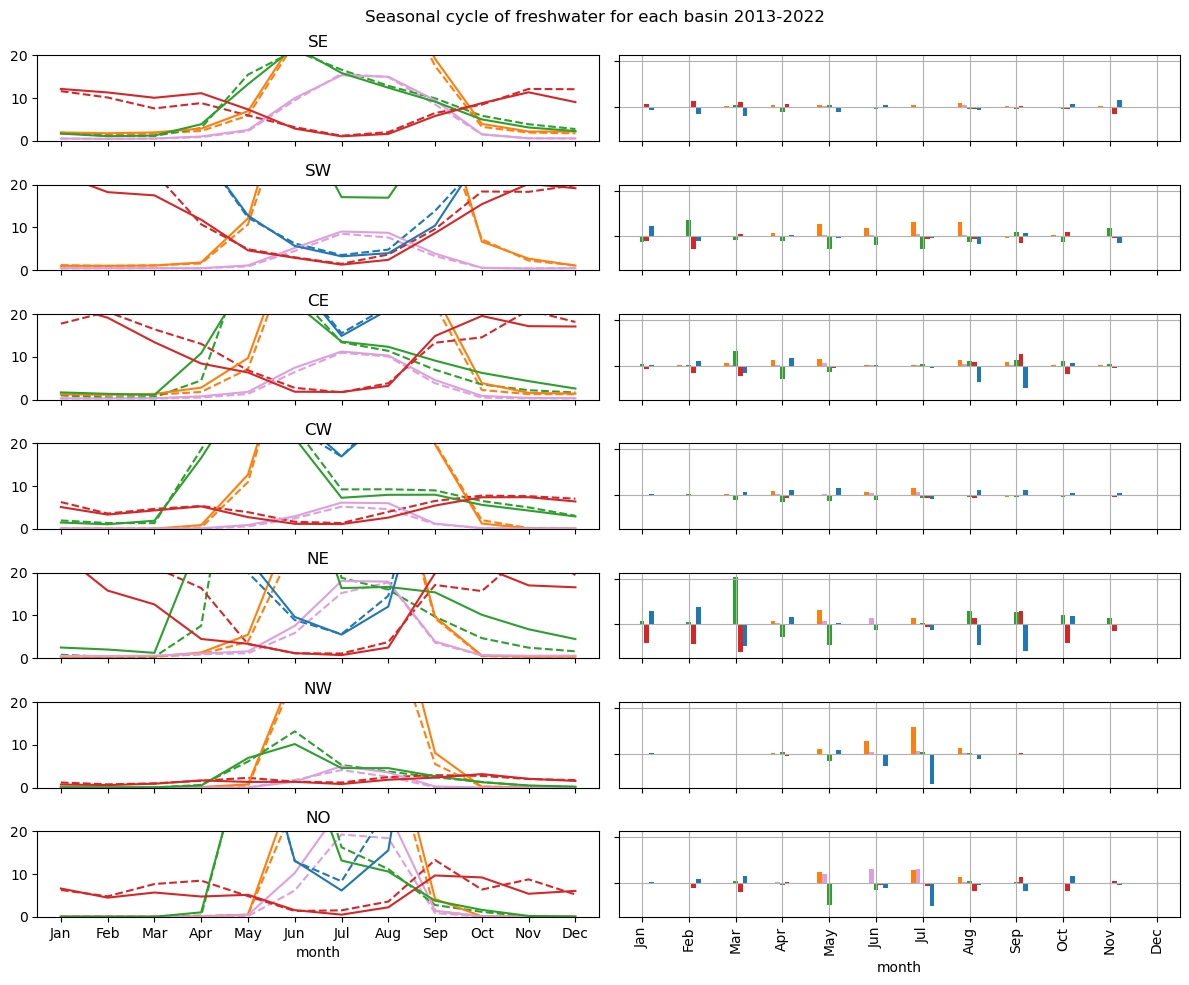

In [186]:
fig, axs = plt.subplots(7,2, sharex=True, figsize=(12, 10), sharey='col')
lines, labels = [], []

FW_sources_racm = ['Liquid Runoff Ice Sheet', 'Liquid Runoff Ice Caps',
       'Liquid Runoff Tundra', 'Precipitation Fjords',
        'Solid Ice Discharge']
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

def percentage(df):
    return (df.T/df.sum(axis=1)).T *100

for i, basin in enumerate(dict_sections.values()):
    ax = axs[:,0].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector = percentage(df_single_sector[FW_sources_racm])   

    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector_early= dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector_early = percentage(df_single_sector_early[FW_sources_racm])
    df_single_sector_early.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    ax.title.set_text(basin)


    # rightrow
    ax_right = axs[:,1].flatten()[i]
    df_single_sector_change = df_single_sector-df_single_sector_early
    df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])
    ax_right.grid()

axs[0,-1].set_xlim([0.5, 12.5])
ax.set_ylim([0, 20])
ax.set_xticks(ticks = np.arange(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
fig.delaxes(axs.flatten()[7])

lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in data_mean_perc.columns])
    ax.title.set_text(basin)
    ax.set_xlim([1, 12])
    ax.set_xticks(np.arange(1, 13))
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")

In [347]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names_id = dict(zip(np.arange(1, 13), month_names))

In [348]:
csv_seasonal_sector = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/Seasonal cycle per sector"

------> SE
Solid Ice Discharge: 86% in Mar
Liquid Runoff Ice Sheet: 41% in Jul
Liquid Runoff Tundra: 22% in Jun
Liquid Runoff Ice Caps: 15% in Jul
Precipitation Fjords: 12% in Jan


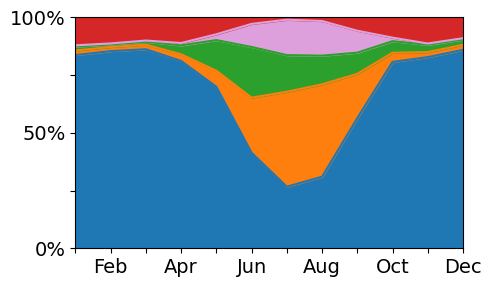

------> SW
Solid Ice Discharge: 56% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Tundra: 69% in May
Liquid Runoff Ice Caps: 9% in Jul
Precipitation Fjords: 22% in Jan


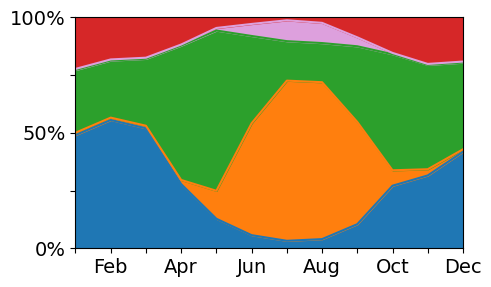

------> CE
Solid Ice Discharge: 84% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Tundra: 29% in May
Liquid Runoff Ice Caps: 11% in Jul
Precipitation Fjords: 22% in Jan


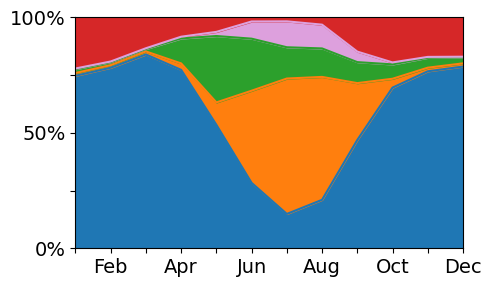

------> CW
Solid Ice Discharge: 95% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Tundra: 34% in May
Liquid Runoff Ice Caps: 6% in Jul
Precipitation Fjords: 7% in Nov


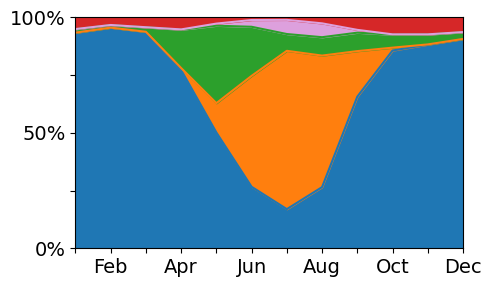

------> NE
Solid Ice Discharge: 85% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Tundra: 66% in May
Liquid Runoff Ice Caps: 18% in Jul
Precipitation Fjords: 25% in Jan


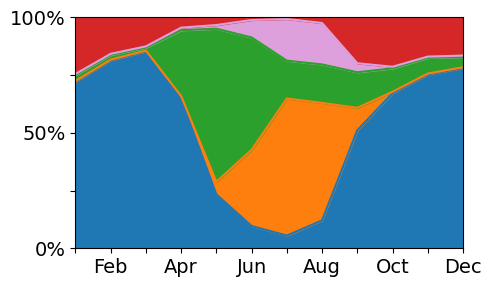

------> NW
Solid Ice Discharge: 99% in Feb
Liquid Runoff Ice Sheet: 62% in Jul
Liquid Runoff Tundra: 10% in Jun
Liquid Runoff Ice Caps: 5% in Jul
Precipitation Fjords: 3% in Oct


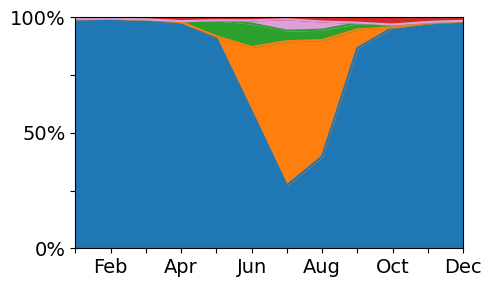

------> NO
Solid Ice Discharge: 95% in Feb
Liquid Runoff Ice Sheet: 55% in Jul
Liquid Runoff Tundra: 44% in Jun
Liquid Runoff Ice Caps: 26% in Jul
Precipitation Fjords: 10% in Sep


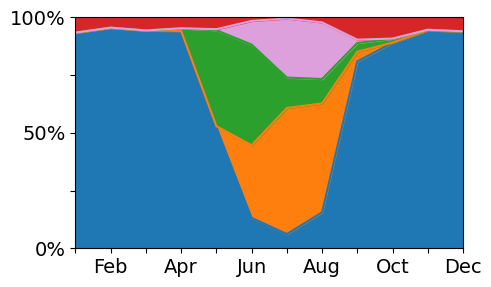

In [659]:
col_order_rel_sector = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet','Liquid Runoff Tundra',  'Liquid Runoff Ice Caps', 'Precipitation Fjords']


pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticks = np.linspace(0,1,5, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%2==0 else " " for i, ytick in enumerate(yticks)]
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')
for i, basin in enumerate(dfRunoffIceSector.columns):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    df_single_sector = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')
    # add standard deviation as shading
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T
    (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/{basin}_Seasonal.csv")

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # for var in df_single_sector.columns:
    #     ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color='Solid Ice discharge'[var])
    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 13, ),months, fontsize=14)
    ax.set_ylim([0, 1]  )
    ax.set_yticks(yticks, yticklabels, fontsize=14)
    ax.set_xlabel('')
    # set template
    # fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_{basin}.png", bbox_inches='tight', transparent=True)
    plt.show()

In [257]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'tab10' colormap
cmap = plt.get_cmap('tab10')

# Get the RGB values of the colors in the colormap
rgb_values = [mcolors.to_rgb(cmap(i)) for i in range(cmap.N)]

# Create the dictionary
dict_colors_FW_rgb = {
    'Liquid Runoff Ice Sheet': rgb_values[1],
    'Liquid Runoff Ice Caps': rgb_values[4],
    'Liquid Runoff Tundra': rgb_values[2],
    'Precipitation Fjords': rgb_values[3],
    'Solid Ice discharge (weighted mean)': rgb_values[0],
    'Solid Ice Discharge': rgb_values[0],
    'Solid Ice discharge': rgb_values[0]

}


In [245]:
df_sector_all = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().to_dataframe()
df_sector_seasonal_relative = (df_sector_all.T/df_sector_all.sum(axis=1)).T
df_sector_seasonal_relative_per_sector = df_sector_seasonal_relative.stack().reset_index().rename(columns={'level_2':'Source', 0:'%'})
df_sector_seasonal_relative_per_sector["%"] = (df_sector_seasonal_relative_per_sector["%"] * 100).round(1)

In [261]:
dict_colors_FW = dict(zip(data_varsFW, colors_FW))
dict_colors_FW['Solid Ice Discharge'] = 'tab:blue'

In [350]:
import plotly.graph_objects as go
import plotly.io as pio




# replace Solid_iCE discharge with Solid Ice discharge (weighted mean)
# df_sector_windrose['Source'] = df_sector_windrose['Source'].replace('Solid Ice discharge (weighted mean)', 'Solid Ice Discharge')
for basin in ['NO', 'NE', 'CE', 'SE', 'SW', 'CW', 'NW']:
    fig = go.Figure()

    df_sector_windrose = df_sector_seasonal_relative_per_sector[df_sector_seasonal_relative_per_sector['Basins'] == basin]
    for source in df_sector_windrose['Source'].unique():
        df_source = df_sector_windrose[df_sector_windrose['Source'] == source]
        fig.add_trace(go.Barpolar(
            r=df_source['%'].values,
            name=f"{basin} {source}",
            marker_color=f'rgb{dict_colors_FW_rgb[source]}',
        ))

    fig.update_traces(text=month_names)
    # fig.update_traces(text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'])
    fig.update_layout(
        font_size=16,
        polar_radialaxis_ticksuffix='%',
        polar_radialaxis_tickvals=[0, 20, 40, 60, 80, 100],
        polar_radialaxis_ticktext=['', '', '', '', '', ''],
        showlegend=False, 
        legend_font_size=16,
        polar_angularaxis_direction='clockwise',
        polar_angularaxis_rotation=90,
        template="plotly_white",
        polar_angularaxis_tickvals=np.arange(0,360,30),
        polar_angularaxis_ticktext=month_names,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)', 
        width =400,
        height =400)
    # fig.write_image(pathFigures + f"Windrose_{basin}.png", width=800, height=800, scale=2)

    fig.show()

In [351]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'tab10' colormap
cmap = plt.get_cmap('tab10')

# Get the RGB values of the colors in the colormap
rgb_values = [mcolors.to_rgb(cmap(i)) for i in range(cmap.N)]

# Print the RGB values
for i, rgb in enumerate(rgb_values):
    print(f"Color {i}: {rgb}")

Color 0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
Color 1: (1.0, 0.4980392156862745, 0.054901960784313725)
Color 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
Color 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
Color 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
Color 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
Color 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
Color 7: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
Color 8: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
Color 9: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)


### Per sector timeseries

In [363]:
dsSectorTimeseriesYY[var].sel(Basins=basin)

<xarray.DataArray 'Precipitation Fjords CARRA' (time: 85)> Size: 680B
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       1.75880335, 1.25067656, 2.01071043, 1.7400006 , 2.13948538,
       1.61264421, 1.68402171, 1.70650616, 1.40400188, 1.69336501,
       1.58992523, 1.6915425 , 1.4649318 , 1.9728678 , 1.68495645])
Coordinates:
    Basins   <U2 8B 'NO'
  * time     (time) datetime64[ns] 680B 1939-01-01 1940-01-01 ... 2023-01-01

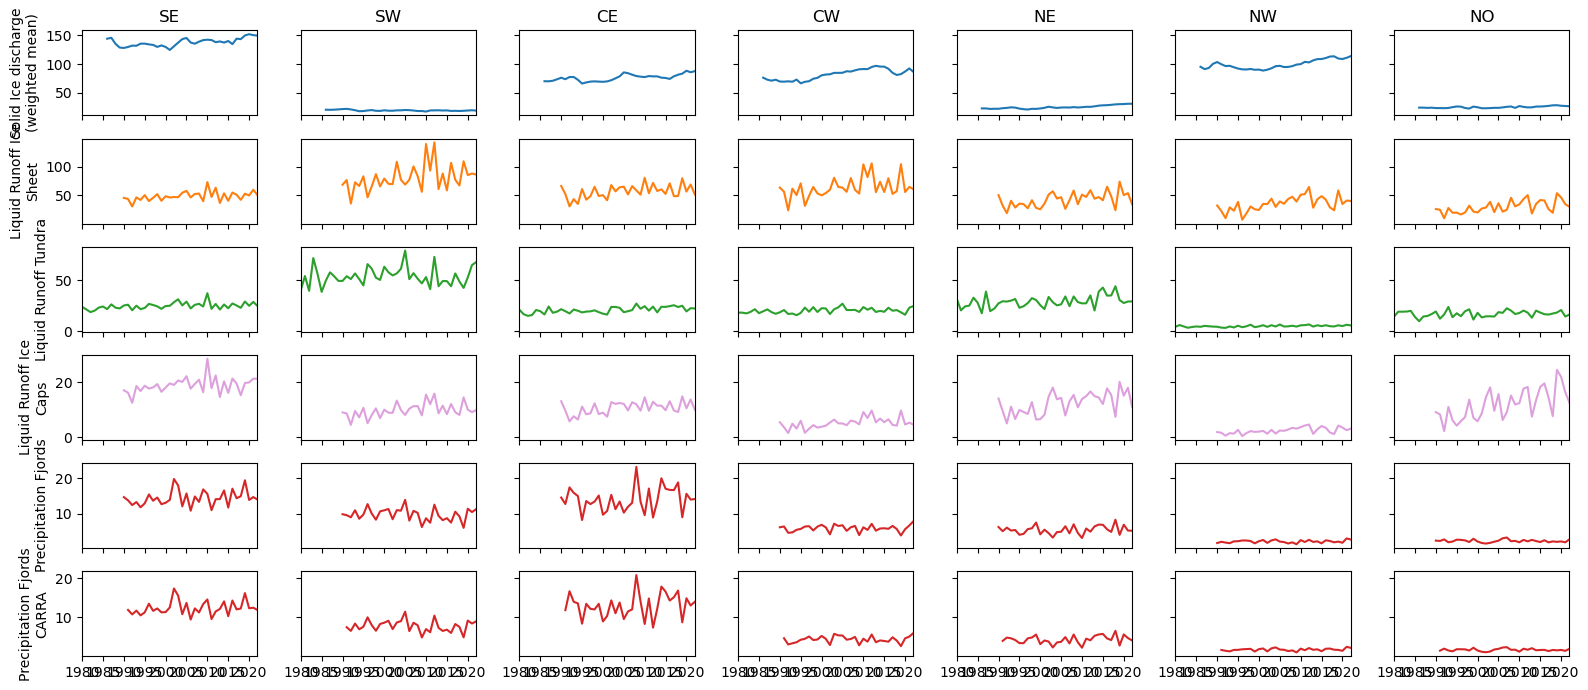

In [527]:
import textwrap

# if sector sum not in locals, read 
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")


# dsSectorTimeseriesYY = (dsSectorSum.resample(time='YS').mean()*12).sel(time=slice('1980', '2022'))

# fig, axs = plt.subplots(6, 7, figsize=(16, 7), sharex=True, sharey='row')

# for j, basin in enumerate(dfRunoffIceSector.columns):
#     axs[0,j].set_title(basin)
#     for i, var in enumerate(dsSectorTimeseries.data_vars):
#         axs[i, j].plot(pd.to_datetime(dsSectorTimeseriesYY.time),dsSectorTimeseriesYY[var].sel(Basins=basin).values, label=f"{var}\n{basin}", color=dict_colors_FW[var])
#         wrapped_label = textwrap.fill(var, 20)  # Wrap text after 10 characters
#         axs[i, 0].set_ylabel(wrapped_label)
#     # format xticks conciseformatter
#     axs[-1, j].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
#     axs[-1, j].set_xlim([pd.to_datetime("1980"), pd.to_datetime("2022")])

# plt.tight_layout()



In [630]:
# Convert the colors to RGB format and store them in the new dictionary
dict_colors_FW_rgb = {}
for source, color in dict_colors_FW.items():
    rgb = mcolors.to_rgb(color)
    dict_colors_FW_rgb[source] = rgb
# Convert the RGB values to CSS color format and store them in a new dictionary
dict_colors_FW_css = {}
for source, rgb in dict_colors_FW_rgb.items():
    css_color = mcolors.rgb2hex(rgb)
    dict_colors_FW_css[source] = css_color

print(dict_colors_FW_rgb)

{'Liquid Runoff Ice Sheet': (1.0, 0.4980392156862745, 0.054901960784313725), 'Liquid Runoff Ice Caps': (0.8666666666666667, 0.6274509803921569, 0.8666666666666667), 'Liquid Runoff Tundra': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'Precipitation Fjords': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'Solid Ice discharge (weighted mean)': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Solid Ice Discharge': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Precipitation Fjords CARRA': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}


['rgba(31, 119, 180, 1)',
 'rgba(255, 127, 14, 1)',
 'rgba(44, 160, 44, 1)',
 'rgba(221, 160, 221, 1)',
 'rgba(214, 39, 40, 1)',
 'rgba(214, 39, 40, 1)']

In [614]:
# import pandas as pd
# import xarray as xr
# import plotly.express as px

# # Check if dsSectorSum is in locals, if not read it
# if 'dsSectorSum' not in locals():
#     dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

# col_order_yearly= ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet', 'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps', 'Precipitation Fjords', 'Precipitation Fjords CARRA']
# colors = ['blue', 'orange', 'green', 'purple', 'red', 'red']
# # Include VFIRS variable in the dataset processing
# dfSectorTimeseriesYY = (
#     dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_abs]
#     .resample(time='YS').mean() * 12
# ).sel(time=slice('1980', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2': 'Source', 0: 'Gt'})
# # Include VFIRS variable in the dataset processing

# # colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_abs]]


# pd.options.plotting.backend = "plotly"

# # Colors for the plot
# colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_yearly]]

# # Plotly figure
# fig = px.line(dfSectorTimeseriesYY, x='time', y='Gt', color='Source', facet_col='Basins', facet_col_wrap=2,
#               facet_col_spacing=0.05, facet_row_spacing=0.03, title="Freshwater flux per source per basin",
#               template='plotly_white',
#              category_orders={'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE',  'NO'][::-1]}
#              )

# for trace in fig.data:
#     if trace.name == 'Precipitation Fjords CARRA':
#         trace.line = dict(dash='dash', width=2, color='red')
# # Update layout
# fig.update_layout(
#     autosize=False, 
#     width=800, 
#     height=800, 
#     template='plotly_white',
#     legend=dict(
#         x=0.6,
#         y=0.02,
#         traceorder="normal",
#     )
# )
# # Update titles for each subplot

# alphabet = "gefcdab"
# for i, annotation in enumerate(fig['layout']['annotations']):
#     annotation.update(
#     text=f"{alphabet[i]} {annotation['text'].split('=')[1].strip()} ",
#     )


# fig.update_yaxes(matches=None, showticklabels=True)

# # fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin.png",)

# fig.show()




In [191]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', size='pop',
                facet_col='year', facet_col_wrap=4)

fig.layout.yaxis.matches = 'y'
fig.layout.yaxis2.matches = 'y'
fig.layout.yaxis3.matches = 'y'
fig.layout.yaxis4.matches = 'y'

fig.layout.yaxis5.matches = 'y5'
fig.layout.yaxis7.matches = 'y5'
fig.layout.yaxis6.matches = 'y5'
fig.layout.yaxis8.matches = 'y5'

fig.layout.yaxis9.matches = 'y9'
fig.layout.yaxis10.matches = 'y9'
fig.layout.yaxis11.matches = 'y9'
fig.layout.yaxis12.matches = 'y9'

fig.show()

In [209]:
(dsSectorSum.resample(time='YS').mean()*12).sum(dim='Basins').to_dataframe().plot()

In [198]:
import pandas as pd
import xarray as xr
import plotly.express as px

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

# Define the columns and colors
col_order_yearly = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet', 'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps', 'Precipitation Fjords', 'Precipitation Fjords CARRA']
colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), 1) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_yearly]]


# Include VFIRS variable in the dataset processing
dfSectorTimeseriesYY = (
    dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly]
    .resample(time='YS').mean() * 12
).sel(time=slice('1990', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2': 'Source', 0: 'Gt'})

# Set plotting backend to Plotly
pd.options.plotting.backend = "plotly"

# Plotly figure with facet grid
fig = px.line(dfSectorTimeseriesYY, x='time', y='Gt', color='Source', facet_col='Basins',
              facet_col_spacing=0.05, facet_row_spacing=0.03, title="Freshwater flux per source per basin",
              facet_col_wrap=2, 
              template='plotly_white', color_discrete_sequence=colors,
              category_orders={'Source': col_order_yearly, 'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE', 'NO'][::-1]}
             )

# Update traces with custom styling
for trace in fig.data:
    if trace.name == 'Precipitation Fjords CARRA':
        trace.line = dict(dash='dash', width=2, color='rgba(214, 39, 40, 1)')
    # if trace.name == 'Solid Ice Discharge':
    #     trace.line = dict(width=2, color='blue')

# Update layout
fig.update_layout(
    autosize=False,
    width=800, 
    height=800, 
    template='plotly_white',
    legend=dict(
        x=0.6,
        y=0.02,
        traceorder="normal"
    )
)
# fig.layout.yaxis.matches = 'y'
# fig.layout.yaxis2.matches = 'y'
# fig.layout.yaxis3.matches = 'y3'
# fig.layout.yaxis4.matches = 'y3'
# fig.layout.yaxis5.matches = 'y5'
# fig.layout.yaxis6.matches = 'y5'


alphabet = "gefcdab"



# # Update annotations with alphabet labels 
for i, annotation in enumerate(fig['layout']['annotations']):
    annotation.update(
        text=f"{alphabet[i]}) {annotation['text'].split('=')[1].strip()} ",
    )

fig.update_yaxes(showticklabels=True, matches=None, rangemode="tozero")
fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin.png")
fig.show()


In [656]:
import plotly.express as px
# if sector sum not in locals, read 
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

alpha = 1 # Adjust this value to change the transparency. 0 is fully transparent, 1 is fully opaque.
colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_abs]]

dfSectorTimeserieMM = (dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_abs].resample(time='MS').mean()*12).sel(time=slice('2012', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2':'Source', 0:'Gt'})
fig = px.area(dfSectorTimeserieMM, x='time', y='Gt', color='Source', line_group='Basins', facet_col='Basins', facet_col_wrap=1, facet_col_spacing=0.04, facet_row_spacing=0.02,  color_discrete_sequence=colors,               category_orders={'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE', 'NO'][::-1]})


fig.update_layout(
    autosize=False, 
    width=800, 
    height=800, 
    template='plotly_white',
    legend=dict(
        x=1,
        y=1,
        traceorder="reversed")
)

alphabet = "abcdefg"
alphabet = "gfedcba"
for i, annotation in enumerate(fig['layout']['annotations']):
    annotation.update(
    text=f"{alphabet[i]}) {annotation['text'].split('=')[1].strip()} ",
    )
fig.update_yaxes(matches=None, showticklabels=True)
fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin_monthly.png")
fig.show()


In [ ]:
dfSectorTimeserieMM.plot()

# Seasonal change

In [289]:
data_varsFW = list(dsSectorSum.data_vars)
data_varsFW

['Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Precipitation Fjords CARRA',
 'Solid Ice discharge (weighted mean)',
 'winter_year',
 'summer_year']

In [265]:
basinorderkarlsson = ["SW", "SE", "NW", "NO", "NE", "CW", "CE"][::-1]

In [282]:
dsSectorSum['winter_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month <= 3) | (dsSectorSum.time.dt.month >= 10), np.nan)
dsSectorSum['winter_year'] = dsSectorSum['winter_year'].where(dsSectorSum.time.dt.month <= 3, dsSectorSum['winter_year'] + 1)
ds_winter_sum = dsSectorSum.groupby('winter_year').mean(skipna=True)
# multiply data_varsFW by 6
ds_winter_sum[data_varsFW] = ds_winter_sum[data_varsFW] * 6
df_winter_sum = ds_winter_sum.to_dataframe()
df_winter_sum["Winter Liquid"] = df_winter_sum["Liquid Runoff Ice Sheet"] + df_winter_sum["Liquid Runoff Ice Caps"] + df_winter_sum["Liquid Runoff Tundra"] + df_winter_sum["Precipitation Fjords"]
df_winter_sum["Winter Solid"] = df_winter_sum["Solid Ice discharge (weighted mean)"]

# Create a new coordinate 'year' for the summer year of each time point
dsSectorSum['summer_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month >= 4) & (dsSectorSum.time.dt.month <= 9), np.nan)
ds_summer_sum = dsSectorSum.groupby('summer_year').mean(skipna=True)
ds_summer_sum[data_varsFW] = ds_summer_sum[data_varsFW] * 6.

ds_summer_sum["Summer Liquid"] = ds_summer_sum["Liquid Runoff Ice Sheet"] + ds_summer_sum["Liquid Runoff Ice Caps"] + ds_summer_sum["Liquid Runoff Tundra"] + ds_summer_sum["Precipitation Fjords"]
ds_summer_sum["Summer Solid"] = ds_summer_sum["Solid Ice discharge (weighted mean)"]
df_summer_sum =ds_summer_sum.to_dataframe()

dfSectorSeasonalSum = pd.concat([df_summer_sum["Summer Liquid"], df_summer_sum["Summer Solid"], df_winter_sum["Winter Liquid"], df_winter_sum["Winter Solid"]], axis=1)
dfSectorSeasonalSum.index.set_names(['Year', 'Basin'], inplace=True)
dfSectorSeasonalSum = dfSectorSeasonalSum.dropna()

In [284]:

dfSectorSeasonalSumdiff = ((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna()
# .to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange.csv")

Text(0.5, 0.98, 'Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)')

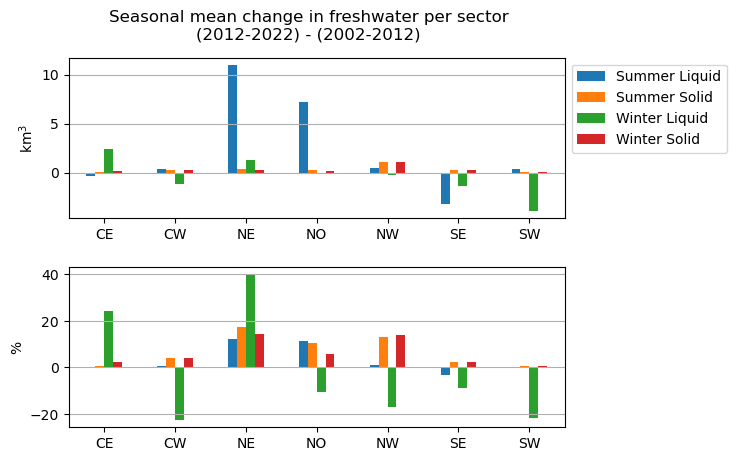

In [285]:
fig, (axKM, axPercent) = plt.subplots(2,1)

((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna().loc[basinorderkarlsson].plot(kind='bar', ax=axPercent,  legend=False, ylabel="%")
# horizontal grid

# drop not gris
(dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()).loc[basinorderkarlsson].plot(kind='bar', ax=axKM, ylabel=r"km$^3$",    legend=False)

axKM.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.subplots_adjust(hspace=0.3)
for ax in [axKM, axPercent]:
    ax.grid(axis='y')
    ax.set_xlabel('')
    # HORIZONTAL XTICKLABLES
    ax.xaxis.set_tick_params(rotation=0)

 
fig.suptitle("Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)")

exporting to excel

In [290]:
data_varsFW = [
'Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Solid Ice discharge (weighted mean)',]


dfSectorSeasonalFWcomp = pd.concat([df_summer_sum[data_varsFW], df_winter_sum[data_varsFW]], axis=1, keys = ['Summer', 'Winter'])

# combine column names
dfSectorSeasonalFWcomp.columns = dfSectorSeasonalFWcomp.columns.map(' '.join)
(dfSectorSeasonalFWcomp.loc['2012':'2022'].groupby('Basins').mean() - dfSectorSeasonalFWcomp.loc['2002':'2012'].groupby('Basins').mean()).dropna().round(1).to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange_FWvars.csv")

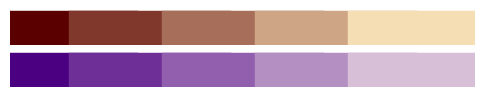

In [291]:
def make_brown_and_purple_color_array(num_colors):
    start_color = np.array([90, 0, 0])  # Maroon (RGB: 128, 0, 0)
    end_color = np.array([245, 222, 179])  # Wheat (RGB: 245, 222, 179)
    colors_brown = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    start_color = np.array([75, 0, 130])  # Indigo (RGB: 75, 0, 130)
    end_color = np.array([216, 191, 216])  # Thistle (RGB: 216, 191, 216)
    colors_indigo_thistle = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    # Convert RGB arrays to hex color codes
    colors_indigo_thistle_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_indigo_thistle]
    colors_brown_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_brown]
    return colors_brown_hex, colors_indigo_thistle_hex

colors_brown_hex, colors_indigo_thistle_hex=make_brown_and_purple_color_array(5)

fig, (ax,axP)= plt.subplots(2,1, figsize=(6, 1))
for i, color in enumerate(colors_brown_hex):
    ax.axhline(0, i / 5, (i + 1) / 5, color=color, linewidth=50)
ax.axis('off')
for i, color in enumerate(colors_indigo_thistle_hex):
    axP.axhline(0, i / 5, (i + 1) / 5, color=color , linewidth=50)
axP.axis('off')
plt.show()


In [292]:
def write_values_in_barh(ax):
    prev_width = 0
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        
        if width <1.5:
            continue

        # Get the color of the bar
        r, g, b, a = p.get_facecolor()

        # Calculate the luminance of the color
        luminance = 0.299*r + 0.587*g + 0.114*b

        # Choose the text color based on the luminance
        text_color = 'white' if luminance < 0.5 else 'black'
        ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color=text_color)
        prev_width = width

In [293]:
dfSectorSeasonalFWcomp['2013':'2023']

Summer Liquid Runoff Ice Sheet  Summer Liquid Runoff Ice Caps  \
       Basins                                                                  
2013.0 SE                           34.617302                      13.951906   
       SW                           60.289978                       8.540026   
       CE                           56.523918                      11.277893   
       CW                           55.148003                       5.372565   
       NE                           43.768459                      14.820007   
...                                       ...                            ...   
2022.0 CE                           50.332199                       9.766074   
       CW                           60.054878                       4.499894   
       NE                           34.002495                      10.894258   
       NW                           39.737389                       3.091695   
       NO                           29.675182                      12.510793   

               Summer Liquid Runoff Tundra  Summer Precipitation Fjords  \
       Basins                                                             
2013.0 SE                        19.491568                     5.448102   
       SW                        32.384472                     5.405826   
       CE                        17.618881                     6.378761   
       CW                        17.101084                     2.872219   
       NE                        19.887516                     4.315382   
...                                    ...                          ...   
2022.0 CE                        20.781933                     4.976133   
       CW                        21.490803                     4.280931   
       NE                        28.240089                     2.808761   
       NW                         5.403870                     1.437664   
       NO                        16.421600                     1.877858   

               Summer Solid Ice discharge (weighted mean)  \
       Basins                                               
2013.0 SE                                       11.799496   
       SW                                        1.644106   
       CE                                        6.583571   
       CW                                        8.095149   
       NE                                        2.228478   
...                                                   ...   
2022.0 CE                                        7.364868   
       CW                                        7.233343   
       NE                                        2.604965   
       NW                                        9.524197   
       NO                                        2.263469   

               Winter Liquid Runoff Ice Sheet  Winter Liquid Runoff Ice Caps  \
       Basins                                                                  
2013.0 SE                            1.572778                       0.562670   
       SW                            1.865695                       0.142876   
       CE                            0.587895                       0.131856   
       CW                            0.164542                       0.034082   
       NE                            0.050548                       0.077491   
...                                       ...                            ...   
2022.0 CE                            0.677519                       0.145094   
       CW                            0.034347                       0.043773   
       NE                            0.047308                       0.081582   
       NW                            0.056563                       0.001804   
       NO                            0.011158                       0.005557   

               Winter Liquid Runoff Tundra  Winter Precipitation Fjords  \
       Basins                                                             
2013.0 SE    

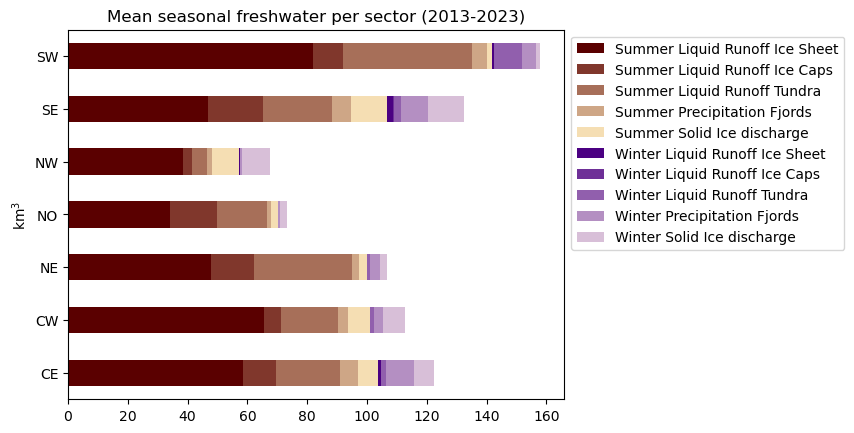

In [294]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_hex =  colors_brown_hex +colors_indigo_thistle_hex

fig,ax = plt.subplots(1, 1,)
dfSectorSeasonalFWcomp['2013':'2023'].groupby('Basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson].plot(kind='barh', stacked=True, ylabel="km$^3$", legend=True, ax=ax, color=colors_hex)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")


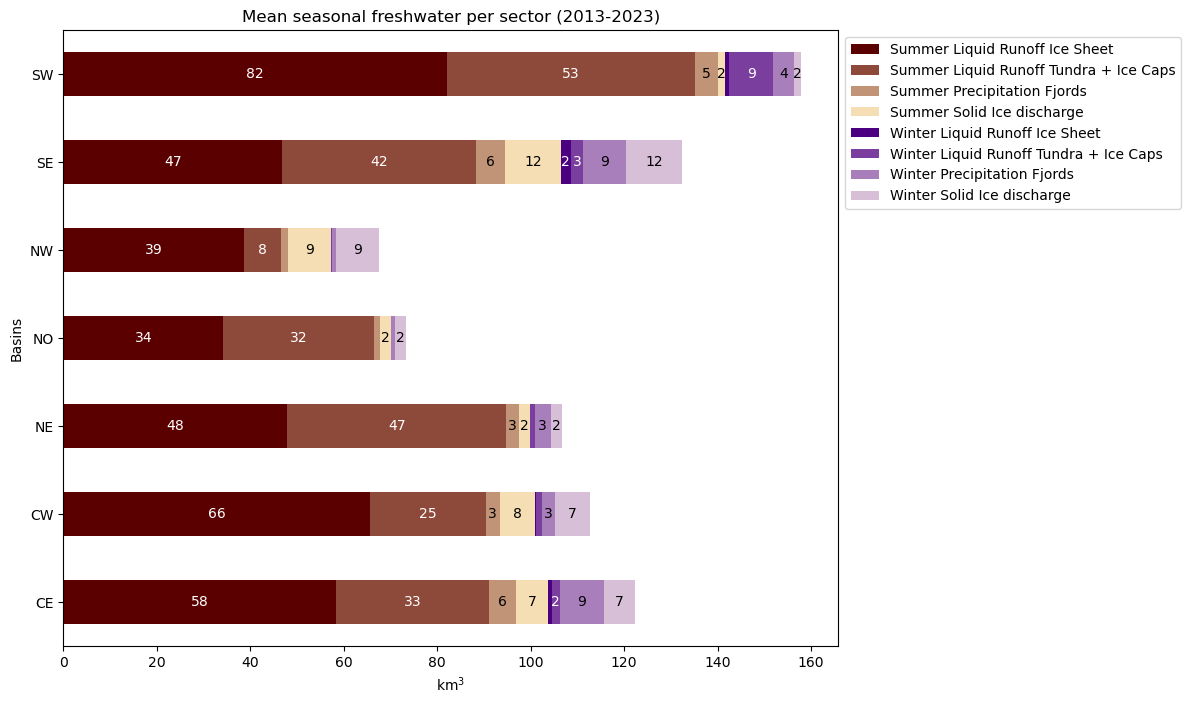

In [295]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_brown_hex4, colors_indigo_thistle_hex4=make_brown_and_purple_color_array(4)
colors_hex4 =  colors_brown_hex4 +colors_indigo_thistle_hex4

# fig,ax = plt.subplots(1, 1,figsize=(5, 8)) 
fig,ax = plt.subplots(1, 1,figsize=(10,8))
# make a local variable
dfSectorSeasonalFWcomp_4_only =dfSectorSeasonalFWcomp['2013':'2023'].groupby('Basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson]
dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only=dfSectorSeasonalFWcomp_4_only.loc[:,['Winter Solid Ice discharge', 'Winter Precipitation Fjords', 'Winter Liquid Runoff Tundra + Ice Caps', 'Winter Liquid Runoff Ice Sheet', 'Summer Solid Ice discharge', 'Summer Precipitation Fjords', 'Summer Liquid Runoff Tundra + Ice Caps', 'Summer Liquid Runoff Ice Sheet'][::-1]]
# dfSectorSeasonalFWcomp_4_only = dfSectorSeasonalFWcomp_4_only.div(dfSectorSeasonalFWcomp_4_only.sum(axis=1), axis=0)

dfSectorSeasonalFWcomp_4_only.plot(kind='barh', stacked=True, xlabel="km$^3$", legend=True, ax=ax, color=colors_hex4)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")
write_values_in_barh(ax)

Text(0.5, 0, 'km$^3$ w.e. per year')

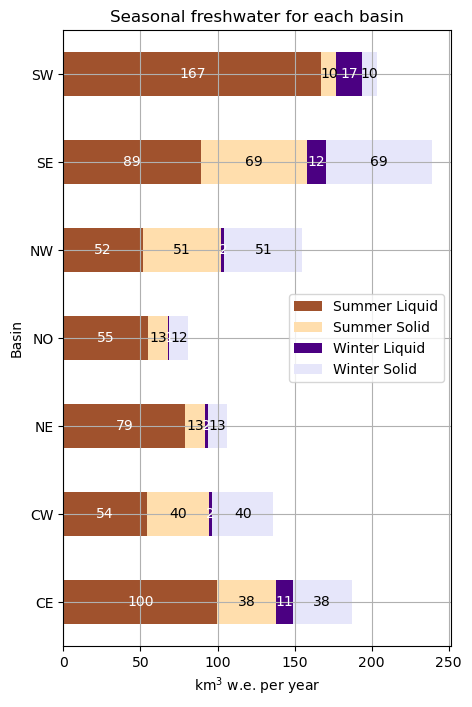

In [ ]:
colors_seasons = ['sienna', 'navajowhite', 'indigo', 'lavender']

# Create the bar plot and get the returned Axes object
ax = dfSectorSeasonalSum.groupby('Basin').mean().div(
    1
    # dfSectorSeasonalSum.groupby('Basin').mean().sum(axis=1), axis=0
    ).loc[basinorderkarlsson].plot(kind='barh', stacked=True, figsize=(5, 8), color=colors_seasons, title="Seasonal freshwater for each basin")
write_values_in_barh(ax)

plt.grid()

# km 3 w.e.
plt.xlabel("km$^3$ w.e. per year")